<hr><font color="green"><h1>from file: adult-income-dataset-from-scratch</h1></font>

##### 

![Alt Text](https://www.owen.org/wp-content/uploads/inequaltyscreencap.png)

<h1 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> About this Kernel </h1>

This dataset has been taken from the famous UCI Machine Learning Repository. The goal of this notebook is to accurately predict whether or not an adult makes more than 50000 US Dollars in an year on the basis of the feautures given. 


<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Introduction </h3>

Int his notebook, I will be using only one Machine Learning Algorithm to implement the predictions. This notebook is going  to be different from my previous works because I'll try to implement Logistic Regression from scratch rather than using scikit-learn. 

> So, without any further delay, lets get into it!


<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Loading the data </h3>


In [2]:
import warnings 
warnings.filterwarnings('ignore')

# ************** DATA MANIPULATION *****************

import pandas as pd
import numpy as np

# ************** DATA VISUALIZATION ****************

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression

# ************* METRICS ****************************

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook')



In [4]:
df = pd.read_csv('data/adult.csv')

df.head()

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> About the Dataset </h3>

* **Age**: Describes the age of individuals. Continuous.
* **Workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **fnlwgt**: Continuous.
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num**: Number of years spent in education. Continuous.
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex**: Female, Male.
* **capital-gain**: Continuous.
* **capital-loss**: Continuous.
* **hours-per-week**: Continuous.
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* **salary**: >50K,<=50K

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

* The dataset contains absolutely **no null values**! 
* Age, Final Weight, Education Number, Capital Gain, Capital Loss and Hours Per Week are integer columns.
* There are no Float Datatypes in the dataset.
* Workclass, Education, Marital Status, Occupation, Relationship, Race, Sec, Native Country and Income are of object datatypes.
* Although the dataset does not contain any null values, a closer look (see cell 3) tells us that there are a lot of **'?'** values in our dataset. We will have to **replace** those values!

In [11]:
df.describe().T

count           mean            std      min       25%  \
age             32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt          32561.0  189778.366512  105549.977697  12285.0  117827.0   
education.num   32561.0      10.080679       2.572720      1.0       9.0   
capital.gain    32561.0    1077.648844    7385.292085      0.0       0.0   
capital.loss    32561.0      87.303830     402.960219      0.0       0.0   
hours.per.week  32561.0      40.437456      12.347429      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
fnlwgt          178356.0  237051.0  1484705.0  
education.num       10.0      12.0       16.0  
capital.gain         0.0       0.0    99999.0  
capital.loss         0.0       0.0     4356.0  
hours.per.week      40.0      45.0       99.0

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

* The minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the average age is 37.
* The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
* While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.
* The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

In [14]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

* We can see that the columns **workclass**, **occupation**, and **native.country** contains null values. We would have to find out a way to deal with them!
* There can be many ways to impute missing values, but right now, for the sake of simplicity we would impute them using **mode**!

In [17]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

<h1 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Exploratory Data Analysis </h1>

![Alt Text](https://www.statistika.co/images/services/Exploratory%20Data%20Analysis%20-%20EDA%201000x468.jpg)

**Before beginning, let us understand a bit about our data.**
> Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

Prediction task is to determine whether a person makes over 50K a year.

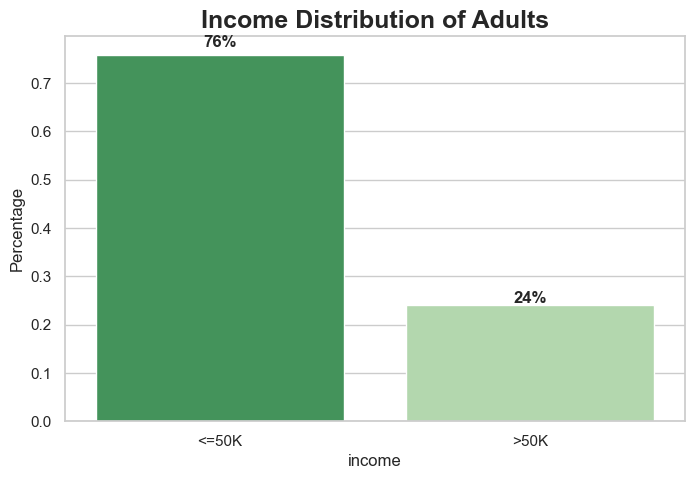

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

In the EDA Section, I wanted to start by analysing our target variable first. We have come across a very obvious observation!

* The number of people earning more than **50K dollars** an year is one third of the people earning less than it.
* We should also keep in mind that this data was collected in **1996**, so 50K dollars of that tme, might not be the same in today's time!

In [23]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

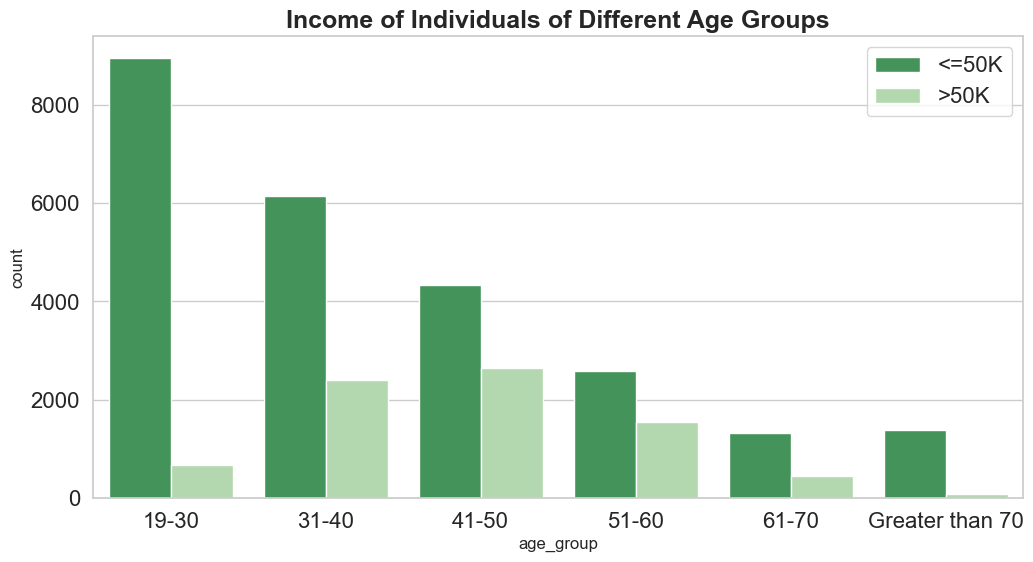

In [37]:
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x='age_group', hue='income', data=df, palette='Greens_r', order=order_list)
plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

We make an interesting observation over here. We see that people earning more than 50K dollars increase as the age increases upto a certain extent.
* As one might imagine, the number of people earning more than **50K** is quite negligible amongst people of **age group 19-30**.
* For the people of age group **41-50** and **51-60**, the number of people earning **more than 50K** is quite comparable to those earning less than it!

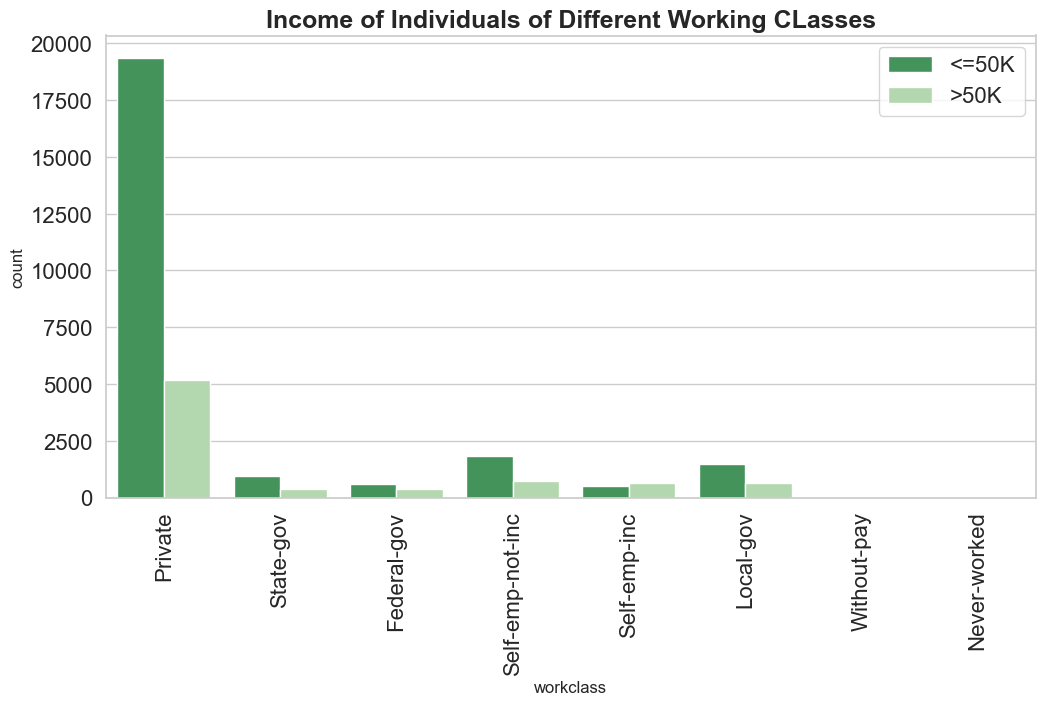

In [43]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x='workclass', hue='income',data=df, palette='Greens_r')
#sns.countplot(x='age_group', hue='income', data=df, palette='Greens_r', order=order_list)
plt.title('Income of Individuals of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

In the above graph, we have segregated the incomes of adults on the basis of their different working classes.

* It is quite interesting to see that **Self-Employed** is the only category where the number of people who earn more than 50K dollars exceed those earning less than it! It might be conducive to suggest that when you handle your own business, start-up, etc. you are more likely to earn better if it gets successful!
* People working in the **Private Sector** face a significant difference between their pays where more than **75%** of them earn less than 50K dollars an year!
* There is a very minute difference between the number of people whose income is more or less than 50K dollars an year who work for the **Federal Govt.**
* People belonging to the category **Without-Pay** and **Never-Worked** hardly contain any data in both the categories.

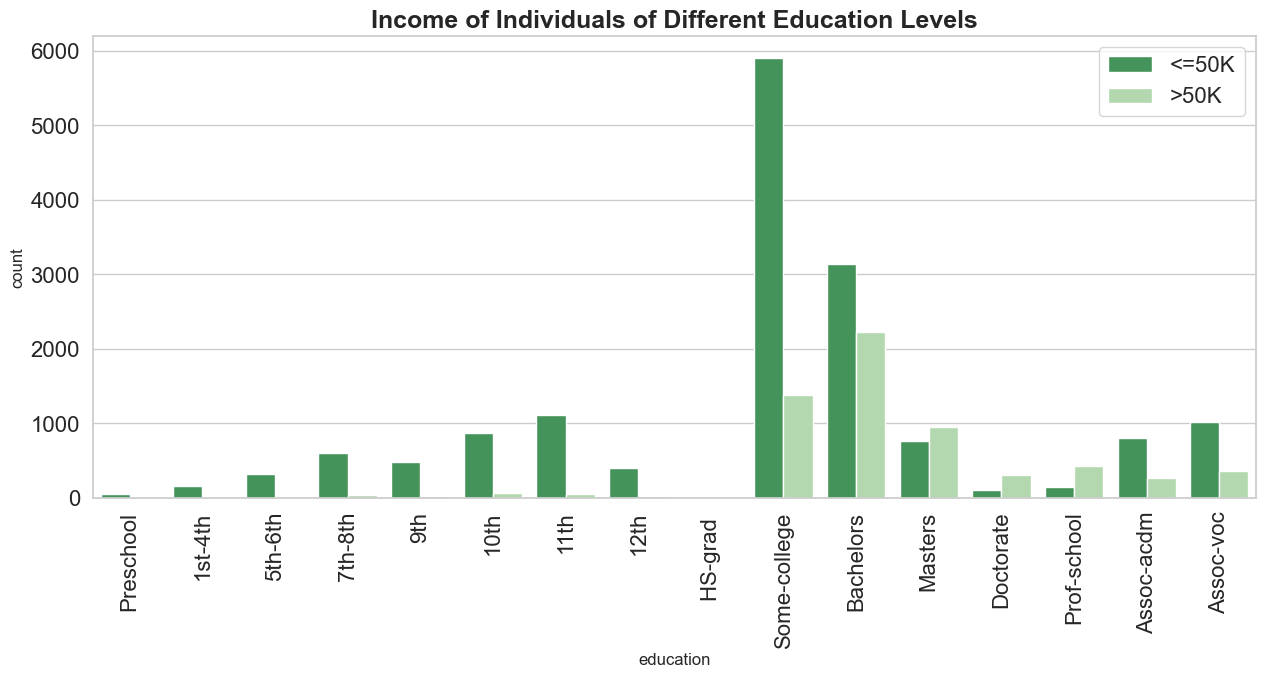

In [46]:
plt.figure(figsize=(15,6))
order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 
              'Assoc-acdm', 'Assoc-voc']
#sns.countplot(df['education'], hue = df['income'], palette='Greens_r', order= order_list)
sns.countplot(x='education', hue='income', data=df, palette='Greens_r', order=order_list)
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

We can draw a few insightful conclusions from this graph.

* For the people who have completed their **education up till 12th Standard**, there are just a handful of them who earn more than 50K dollars an year. Most of the people end up earning below 50K!
* For the people belonging to **Bachelors**, **Masters**, **Doctorate**, **Prof-school** category in the education level, there are more number of people who are earning greater than **50K** dollars an year than the number of people earning less than it.
* In case of **Assoc-acad** or **Assoc-voc**, there are a few people who earn more than **50K** dollars an year!

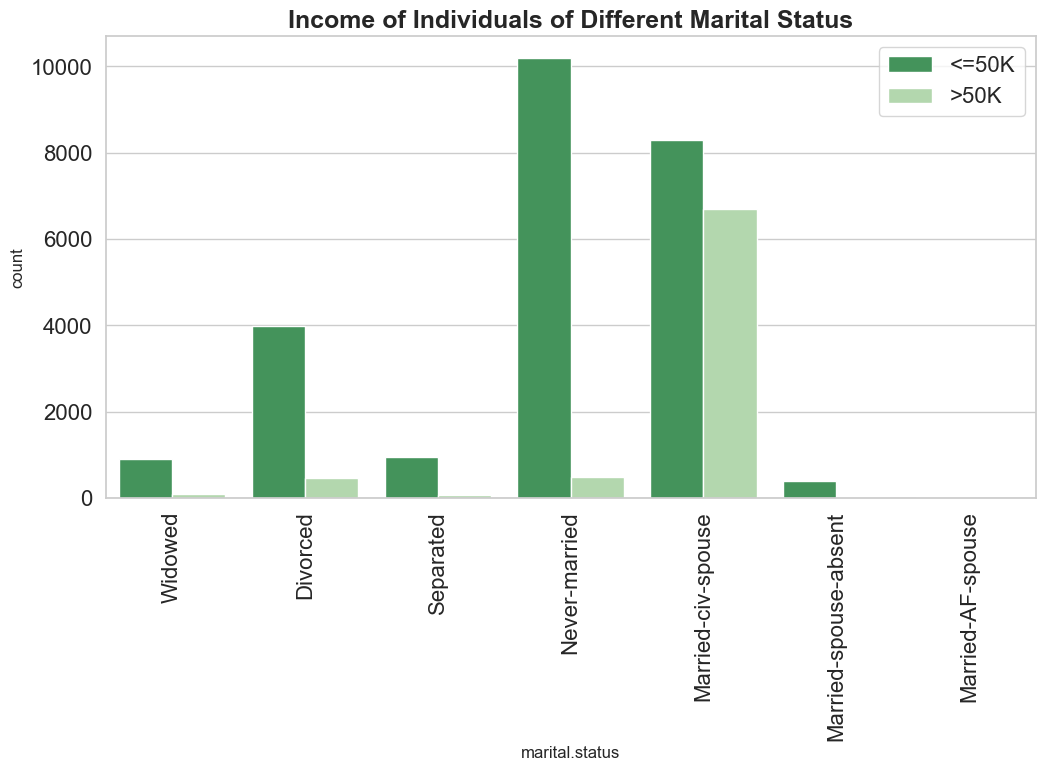

In [55]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
#sns.countplot(df['marital.status'], hue = df['income'], palette='Greens_r')
sns.countplot(x='marital.status', hue='income', data=df, palette='Greens_r')
plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

* One thing to note here is that **Married-civ-spouse** is the only category which has comparable number of people belonging to both categories. 
* For others, there are less than **25%** of the adults earning more than **50K** dollars an year.

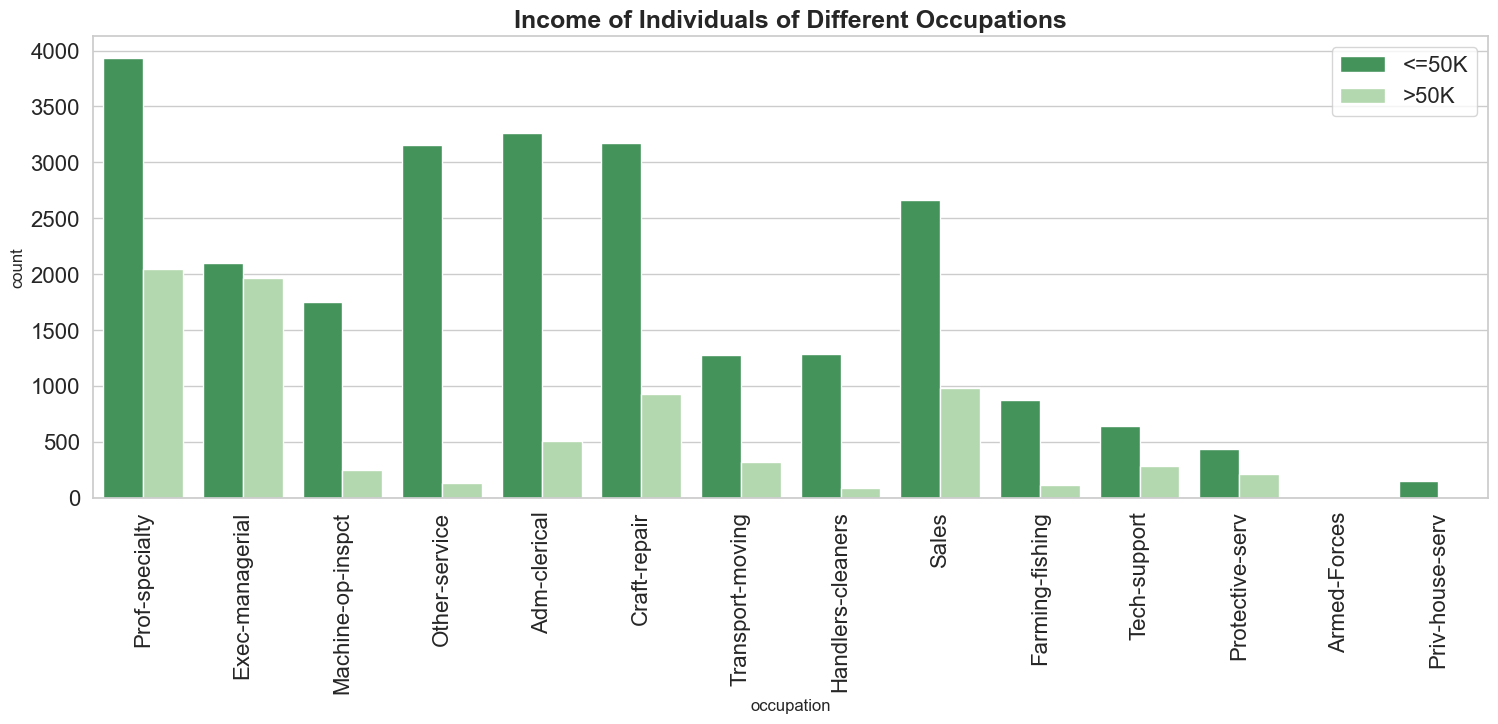

In [57]:
plt.figure(figsize=(18,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
#sns.countplot(df['occupation'], hue = df['income'], palette='Greens_r')
sns.countplot(x='occupation', hue='income', data=df, palette='Greens_r')
plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

A few points to note over here:-

* Adults in **Exec-managerial** role are equally likely to earn more than **50K** dollars an year. 
* There's close to **33%** probablity for an adult in **Prof-specialty** to earn more than **50K** dollars an year.
* Adults working in **Farming-fishing**, **Machine-op-inspect**, **Other-service**, **Adm-clerical**, **Transport-moving** are very less likely to earn more than **50K** dollars an year.
* Around **25%** of the people working in **Sales** earn more than **50K** dollars an year.

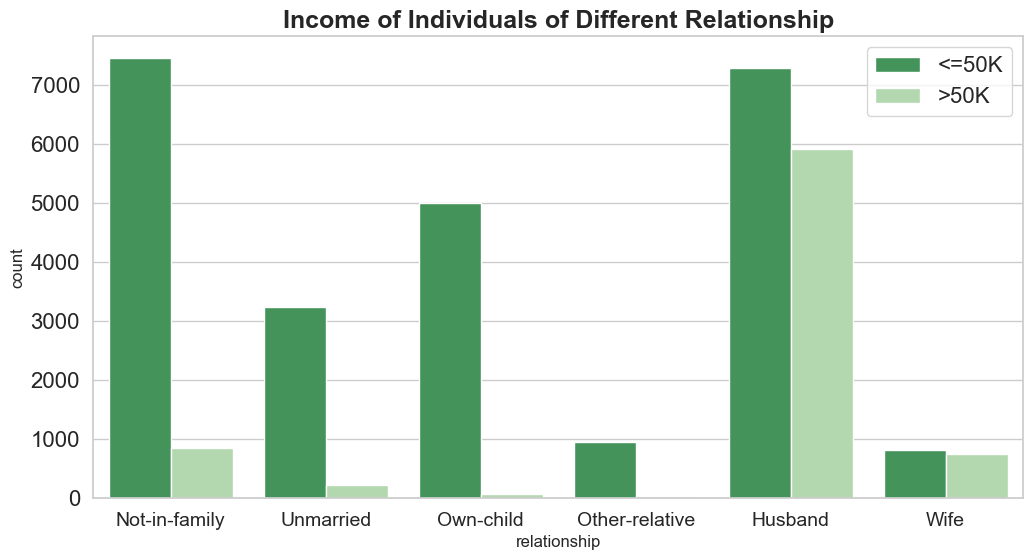

In [59]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
#sns.countplot(df['relationship'], hue = df['income'], palette='Greens_r')
sns.countplot(x='relationship', hue='income', data=df, palette='Greens_r')
plt.title('Income of Individuals of Different Relationship', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

* **Wives** are equally likely to earn more than **50K** dollars an year.
* For **Husbands**, although significant, there is less possibility of them to earn more than **50K** dollars an year.
* There are just a handful of **Unmarried** people earning more than **50K** dollars an year.


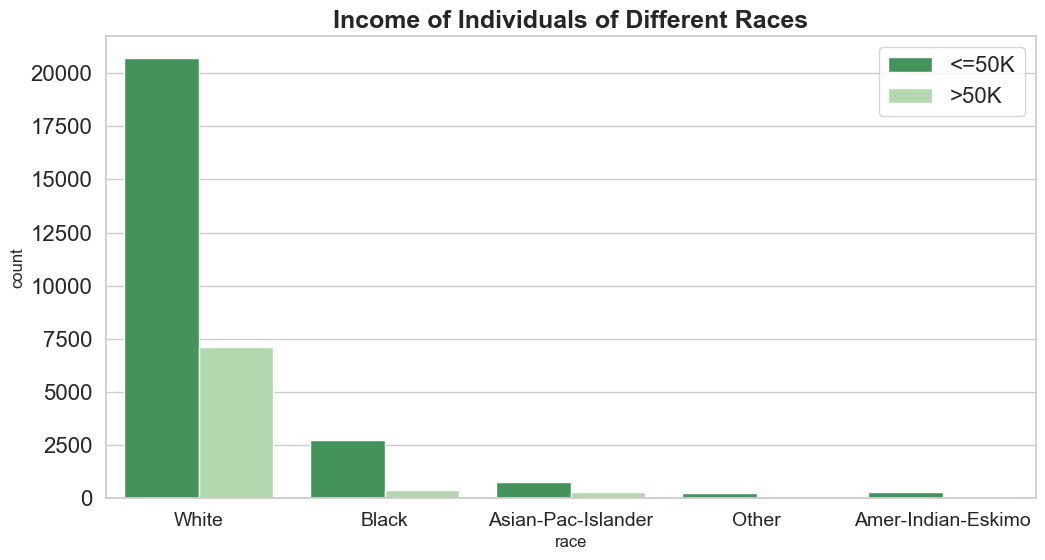

In [61]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
#sns.countplot(df['race'], hue = df['income'], palette='Greens_r')
sns.countplot(x='race', hue='income', data=df, palette='Greens_r')
plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

An important point to notice over here is that, except **Whites** there are very few people of different races. Due to this one may fail to notice the exact percentage and relationship of people earning more than 50K dollars an year. 

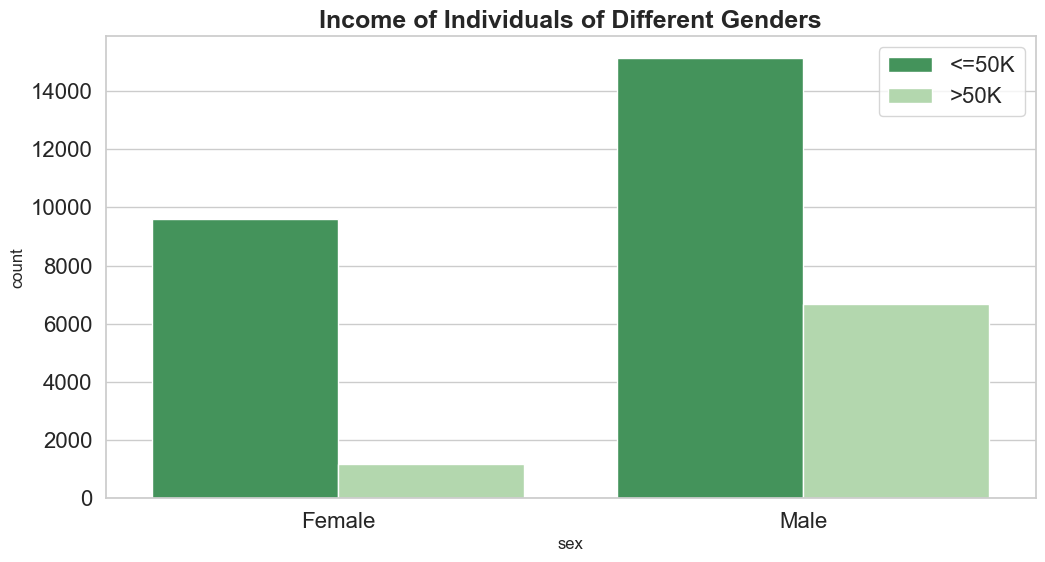

In [65]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
#sns.countplot(df['sex'], hue = df['income'], palette='Greens_r')
sns.countplot(x='sex', hue='income', data=df, palette='Greens_r')
plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

We can see a significant gap in the earnings between males and females over here. 

* For **Females**, there are less than **10%** of the adults earning more than **50K** dollars an year.
* In case of **Males** there are close to **33%** of them earning more than **50K** dollars an year.

In [68]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})


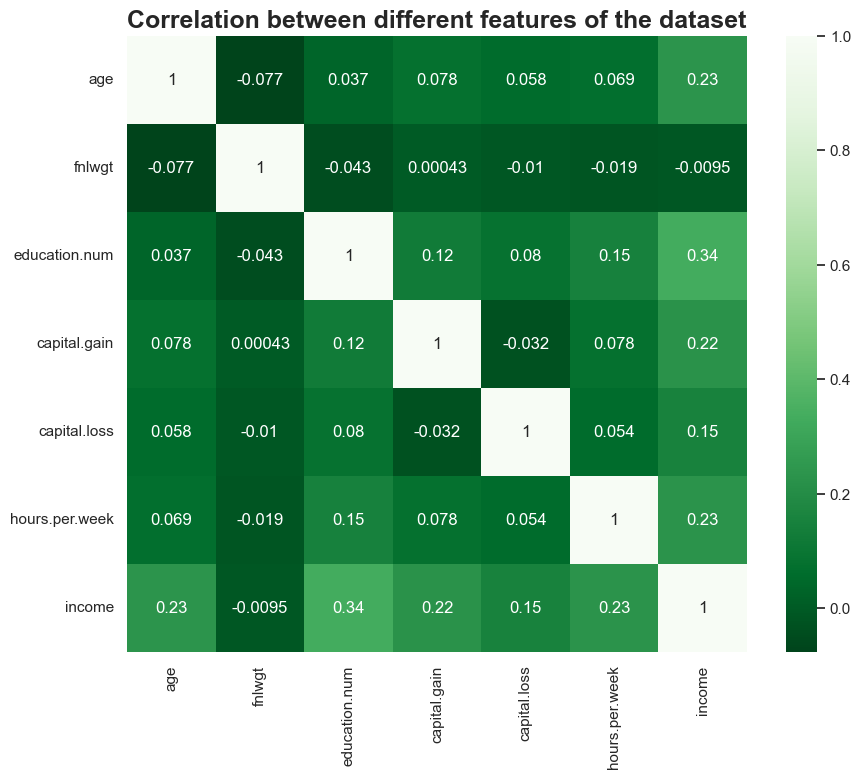

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.title("Correlation between different features of the dataset", fontsize=18, fontweight='bold')
sns.heatmap(corr_matrix, cmap='Greens_r', annot=True)
plt.show()

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

Here, we have tried to plot a correlation map in order to see whether or not the independent features are related to the dependent features.

* We see that most of the features are positively correlated with the **Income Variable**.
* An important thing to note over here is that, we have not covered the object datatypes in this correlation graph. 

In [74]:
#Distributing Age column in 3 significant parts and plotting it corresponding to the output feature(income)

#Combining the lower grades of education together

df.drop(['education.num'], axis = 1, inplace = True)
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)

df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)



In [76]:
df.drop('age_group', inplace = True, axis = 1)

<h1 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Model Implementation </h1>

* So, coming to the part I'm finally excited about! 
* This notebook is special to me as it is the first time I'm trying to implement any model from scratch. 

* Here, I'll be using **Logistic Regression Model** and try to build it from scratch. 
* I will then do the same by using Scikit-learn package and see if there's a major difference in the accuracy!

In [79]:
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country']
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])
    
from sklearn.model_selection import train_test_split
x = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']
    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> About Logistic Regression: </h3>


Before we start coding let us first understand or atleast try to understand the things happening at the back-end of **Scikit Learn's Logistic Regression**. The aim of this section is to explain the math behind Logistic Regression and to accomplish the first objective of this kernel. 

To be able to do this we must answer the question, how does a Logistic Regression work? In theory, a Logistic regression takes input and returns an output of probability, a value between 0 and 1. How does a Logistic Regression do that? With the help of a function called a logistic function or most commonly known as a **sigmoid**. This sigmoid function is reponsible for predicting or classifying a given input.

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> About the Sigmoid function: </h3>

* It is a mathematical function having a characteristic that can take any real value and map it to between 0 to 1 shaped like the letter “S”. 
* The sigmoid function also called a **logistic function**.
* The sigmoid function g(z) takes features and weights z as an input and returns a result between 0 and 1. 
* The output of the sigmoid function is an actual prediction ŷ.
* So, if the value of z goes to **positive infinity** then the predicted value of y will become 1 and if it goes to **negative infinity** then the predicted value of y will become 0. 
* And if the outcome of the sigmoid function is more than 0.5 then we classify that label as **class 1** or positive class and if it is less than 0.5 then we can classify it to negative class or label as **class 0**.

![Alt Text](https://miro.medium.com/max/932/1*bCCcQhMjHGaI89i-7i3xFw.png)


In [84]:
def sigmoid(x, weight):
    z = np.dot(x, weight)
    return 1 / (1 + np.exp(-z))

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> About the Loss Function: </h3>

Weights is a vital part of **Logistic Regression** and other Machine Learning algorithms and we want to find the best values for them. To start we pick random values and we need a way to measure how well the algorithm performs using those random weights. That measure is computed using the loss function. 

The **loss function** is defined as:

![Alt Text](https://miro.medium.com/max/1838/1*dEZxrHeNGlhfNt-JyRLpig.png)




In [87]:
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> About the Gradient Descent: </h3>

**Gradient descent** is an iterative optimization algorithm, which finds the minimum of a differentiable function. In this process, we try different values and update them to reach the optimal ones, minimizing the cost.

* Lets think first step, every thing starts with initializing weights and bias. Therefore cost is dependent with them.
* In order to decrease cost, we need to update **weights** and **bias**.
* In other words, our model needs to learn the **parameters weights** and **bias** that minimize cost function. This technique is called gradient descent.

![Alt Text](https://i.stack.imgur.com/zgdnk.png)


1. The idea is you first select any random point from the function. 
2. Then you need to compute the derivative of J(). 
3. This will point to the direction of the **local minimum**. 
4. Now multiply that resultant gradient with the **Learning Rate**. 
5. The Learning Rate has no fixed value, and is to be decided based on problems.
6. Now, you need to subtract the result from to get the new .
7. This update of should be simultaneously done for every (i).

**Do these steps repeatedly until you reach the local or global minimum. By reaching the global minimum, you have achieved the lowest possible loss in your prediction.**


![Alt Text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS8pJOKA1xjb4sG01ekpv-nwdMHa-OSTTyqHRYDSBEO4W6PE2f3dkHJoDltb4lN2d-dAOs&usqp=CAU)

In [90]:
def gradient_descent(x, h, y):
    return np.dot(x.T, (h - y)) / y.shape[0]
def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Maximum Likelihood Estimation: </h3>


* It its simplest, **MLE** is a method for estimating parameters. 
* Every time we fit a statistical or machine learning model, we are estimating parameters. A single variable linear regression has the equation:

<h4> Y = B0 + B1*X </h4>

Our goal when we fit this model is to estimate the parameters **B0** and **B1** given our observed values of **Y** and **X**. **Maximum Likelihood Estimation** is a way to estimate the parameters of a model, given what we observe.

MLE asks the question, **“Given the data that we observe (our sample), what are the model parameters that maximize the likelihood of the observed data occurring?”**


In [93]:
def log_likelihood(x, y, weights):
    z = np.dot(x, weights)
    ll = np.sum( y*z - np.log(1 + np.exp(z)) )
    return ll

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Gradient Ascent: </h3>

* So after seeing the **Cost Function** and **Sigmoid Function**, now let’s think of an algorithm which can combine these two function and gives us the desired result. 
* The algorithm is the Gradient Ascent algorithm.
* So **Gradient Ascent** is an iterative optimization algorithm for finding local maxima of a differentiable function. 
* The algorithm moves in the direction of gradient calculated at each and every point of the cost function curve till the stopping criteria meets.

![Alt Text](https://slidetodoc.com/presentation_image_h/23f0886a9c3cfd7f583d5c571e50f5dc/image-30.jpg)


> The idea behind **Gradient Ascent** is that gradient points **‘uphill’**. 

So if you slowly slowly moves towards the direction of gradient then you eventually make it to the **global maxima**. 

Gradient ascent has an analogy in which we have to imagine ourselves at the bottom of a mountain valley and left stranded and blindfolded, our objective is to reach the top of the hill. Now to maximize our log likelihood we need to run the gradient ascent function on each parameter i.e.

**weights = weights + learning_rate * gradient**



In [96]:
def gradient_ascent(x, h, y):
    return np.dot(x.T, y - h)
def update_weight_mle(weight, learning_rate, gradient):
    return weight + learning_rate * gradient

In [98]:
import time
start_time = time.time()

num_iter = 100000

intercept = np.ones((x.shape[0], 1)) 
x = np.concatenate((intercept, x), axis=1)
theta = np.zeros(x.shape[1])

for i in range(num_iter):
    h = sigmoid(x, theta)
    gradient = gradient_descent(x, h, y)
    theta = update_weight_loss(theta, 0.1, gradient)
    
print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + " seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))

Training time (Log Reg using Gradient descent):168.4105794429779 seconds
Learning rate: 0.1
Iteration: 100000


In [99]:
result = sigmoid(x, theta)

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Final Implementation: </h3>


In [101]:
f = pd.DataFrame(np.around(result, decimals=6)).join(y)
f['pred'] = f[0].apply(lambda x : 0 if x < 0.5 else 1)
print("Accuracy (Loss minimization):")
f.loc[f['pred']==f['income']].shape[0] / f.shape[0] * 100

Accuracy (Loss minimization):


24.080955744602438

In [102]:
start_time = time.time()
num_iter = 100000
x2 = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]

intercept2 = np.ones((x2.shape[0], 1))

x2 = np.concatenate((intercept2, x2), axis=1)
theta2 = np.zeros(x2.shape[1])

for i in range(num_iter):
    h2 = sigmoid(x2, theta2)
    gradient2 = gradient_ascent(x2, h2, y) #np.dot(X.T, (h - y)) / y.size
    theta2 = update_weight_mle(theta2, 0.1, gradient2)
    
print("Training time (Log Reg using MLE):" + str(time.time() - start_time) + "seconds")
print("Learning rate: {}\nIteration: {}".format(0.1, num_iter))


Training time (Log Reg using MLE):169.86624336242676seconds
Learning rate: 0.1
Iteration: 100000


In [103]:
result2 = sigmoid(x2, theta2)
print("Accuracy (Maximum Likelihood Estimation):")
f2 = pd.DataFrame(result2).join(y)
f2.loc[f2[0]==f2['income']].shape[0] / f2.shape[0] * 100

Accuracy (Maximum Likelihood Estimation):


78.94720678111852

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Logistic Regression using MLE: </h3>

Here, we see that on implementing **Logistic Regression** from Scratch using **Maximum Likelihood Estimation**, we are able to achieve an accuracy of **78.9** %. 
Let us try importing Scikit Learn and compare our model with the inbuilt Logistic Regression of the package.


In [105]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
x = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
    
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [106]:
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc = accuracy_score(y_test, Y_pred)
print("Logistic Regression",acc)



Logistic Regression 0.8010031733033064


In [107]:
X = df[['workclass','education', 'marital.status', 'occupation', 'relationship',
               'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']

 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

lr = LogisticRegression(solver='lbfgs', max_iter=10000)
rs = []
acc = []
for i in range(1,25,1):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
    model_lr_rs = lr.fit(X_train, y_train)
    predict_values_lr_rs = model_lr_rs.predict(X_test)
    acc.append(accuracy_score(y_test, predict_values_lr_rs))
    rs.append(i)

1 0.8025487486565331
2 0.8037770612620913
3 0.8077690772301551
4 0.7953324120988792
5 0.8096115461384923
6 0.7996315062183326
7 0.8027022877322278
8 0.8028558268079227
9 0.8033164440350069
10 0.8037770612620913
11 0.8023952095808383
12 0.8091509289114079
13 0.7996315062183326
14 0.799324428066943
15 0.8002456625211116
16 0.8028558268079227
17 0.804544756640565
18 0.8080761553815446
19 0.7951788730231844
20 0.8057730692461231
21 0.8086903116843237
22 0.7944111776447106
23 0.7997850452940273
24 0.8002456625211116


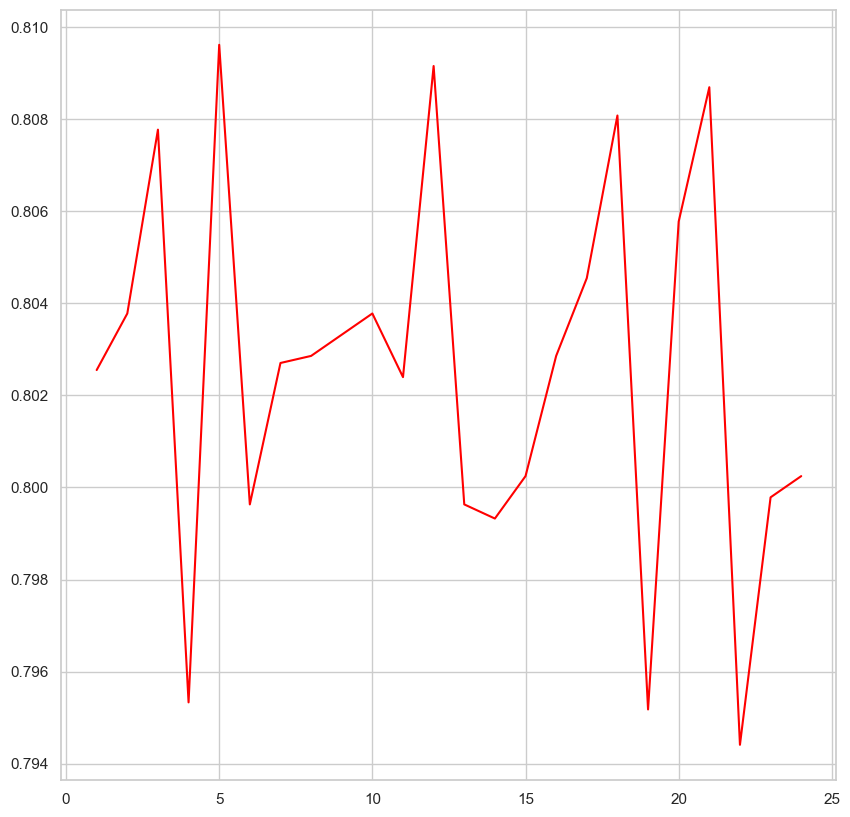

In [108]:
plt.figure(figsize=(10,10))
plt.plot(rs, acc, color ='red')

for i in range(len(rs)):
    print(rs[i],acc[i])

In [109]:
for i in range(0,24):
    if acc[i] > 0.808:
        print(acc[i])

0.8096115461384923
0.8091509289114079
0.8080761553815446
0.8086903116843237



<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Logistic Regression Conclusion: </h3>

We see that the **Logistic Regression using Sklearn** gives us a maximum accuracy of **80.9** %.
Thinking about this, the model that we prepared from scratch was not so bad as compared to the inbuilt one!





<h1 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Summary and Conclusion: </h1>


In this kernel, we've created a **logistic regression from scratch**. We've learned the computations happening at the back-end of a Logistic Regression. We've transormed these equations and mathematical functions into python codes. We've trained our logistic regression function in two ways: through loss minimizing using gradient descent and maximizing the likelihood using gradient ascent. The Adult Income Dataset was used for training and also evaluation.

I'm still trying to find out how I could improve the accuracy of the **Loss Minimizing Logistic Regression**. If you can help me with that, I'll be glad to improve this notebook!

Despite all of these, our function performed quite well I would say, (LOL) it's not that far out from the accuracy of sklearn, however there are other metrics to consider in comparing these models as well.

To wrap things up let us review our objectives and wether we've accomplished them. The first objective was to understand the dataset itself and our EDA helped us gain better insights of the same. Secondly, we wanted to understand the theory behind Logistic Regression. The third objective was to implement the Logistic Regression without using built-in Logistic Regression libraries, yes we've done that as well, and it was trained, and evaluated. 


> This logistic regression implementation would probably be never used in production and it is unlikely that it will defeat sklearn's own LogisticRegression module, however the goal of this kernel was to understand intrecately the structure of different algorithms, in this case, Logistic Regression. 

Thank you so much for checking out this notebook!

<hr><font color="green"><h1>from file: eda-logistic-regression-pca</h1></font>

# **EDA + Logistic Regression + PCA**


Hello friends,

This kernel is all about **Principal Component Analysis** - a **Dimensionality Reduction** technique.

I have discussed **Principal Component Analysis (PCA)**. In particular, I have introduced PCA, explained variance ratio, Logistic Regression with PCA, find right number of dimensions and plotting explained variance ratio with number of dimensions.

I have used the **adult** data set for this kernel. This dataset is very small for PCA purpose. My main purpose is to demonstrate PCA implementation with this dataset.


**I hope you find this kernel useful and your <font color="red"><b>UPVOTES</b></font> would be very much appreciated**

## Table of Contents

The contents of this kernel is divided into various topics which are as follows:-

-   The Curse of Dimensionality
-	Introduction to Principal Component Analysis
-	Import Python libraries
-	Import dataset
-	Exploratory data analysis
-	Split data into training and test set
-	Feature engineering
-	Feature scaling
-	Logistic regression model with all features
-	Logistic Regression with PCA
-	Select right number of dimensions
-	Plot explained variance ratio with number of dimensions
-	Conclusion
-	References
	


## The Curse of Dimensionality

Generally, real world datasets contain thousands or millions of features to train for. This is very time consuming task as this makes training extremely slow. In such cases, it is very difficult to find a good solution. This problem is often referred to as the curse of dimensionality.


**The curse of dimensionality** refers to various phenomena that arise when we analyze and organize data in high dimensional spaces (often with hundreds or thousands of dimensions) that do not occur in low-dimensional settings. The problem is that when the dimensionality increases, the volume of the space increases so fast that the available data become sparse. This sparsity is problematic for any method that requires statistical significance.


In real-world problems, it is often possible to reduce the number of dimensions considerably. This process is called **dimensionality reduction**. It refers to the process of reducing the number of dimensions under consideration by obtaining a set of principal variables. It helps to speed up training and is also extremely useful for data visualization.


The most popular dimensionality reduction technique is Principal Component Analysis (PCA), which is discussed below.



## Introduction to Principal Component Analysis (PCA)


**Principal Component Analysis (PCA)** is a dimensionality reduction technique that can be used to reduce a larger set of feature variables into a smaller set that still contains most of the variance in the larger set. 

### Preserve the variance

PCA, first identifies the hyperplane that lies closest to the data and then it projects the data onto it. Before, we can project the training set onto a lower-dimensional hyperplane, we need to select the right hyperplane. The projection can be done in such a way so as to preserve the maximum variance. This is the idea behind PCA.

### Principal Components

PCA identifies the axes that accounts for the maximum amount of cumulative sum of variance in the training set. These are called Principal Components. PCA assumes that the dataset is centered around the origin. Scikit-Learn’s PCA classes take care of centering the data automatically.

### Projecting down to d Dimensions

Once, we have identified all the principal components, we can reduce the dimensionality of the dataset down to d dimensions by projecting it onto the hyperplane defined by the first d principal components. This ensures that the projection will preserve as much variance as possible.



Now, let's get to the implementation.


## Import Python libraries

In [128]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


# Working with os module - os is a module in Python 3.
# Its main purpose is to interact with the operating system. 
# It provides functionalities to manipulate files and folders.

import os
print(os.listdir("data"))

# Any results you write to the current directory are saved as output.

['Admission_Predict_Ver1.1.csv', 'adult.csv', 'Advertising.csv', 'airline-passengers.csv', 'Algerian_forest_fires_dataset_UPDATE.csv', 'aug_train.csv', 'auto-mpg.csv', 'auto-mpg.data', 'auto-mpg.data-original', 'bank.csv', 'beer.csv', 'BEML.csv', 'bike_buyers.csv', 'bollywood.csv', 'bollywoodmovies.csv', 'bonefracture', 'BoneFractureYolo8', 'breakups.csv', 'CardioGoodFitness.csv', 'Car_Sale_Data.csv', 'churn.csv', 'Cornlife', 'country.csv', 'creditcard.csv', 'curve.csv', 'customerspends.csv', 'diamonds.csv', 'Earnings Manipulation 220.csv', 'Electricity.csv', 'EU_energy_data.csv', 'forecast.xls', 'German Credit Data.csv', 'GLAXO.csv', 'Gold_Price.csv', 'googleplaystore.csv', 'groceries.csv', 'healthcare_subscription_transactions - Copy.csv', 'healthcare_subscription_transactions.csv', 'healthcare_subscription_transactions.xlsx', 'healthdrink.xlsx', 'Heart_disease_data.csv', 'household_power_consumption.txt', 'hr_data.csv', 'Human_Activity_Recognition_Using_Smartphones_Data.csv', 'Incom

### Check file size

In [136]:
print('# File sizes')
for f in os.listdir('data'):
    print(f.ljust(30) + str(round(os.path.getsize('data/' + f) / 1000000, 2)) + 'MB')


# File sizes
Admission_Predict_Ver1.1.csv  0.02MB
adult.csv                     4.1MB
Advertising.csv               0.01MB
airline-passengers.csv        0.0MB
Algerian_forest_fires_dataset_UPDATE.csv0.01MB
aug_train.csv                 1.96MB
auto-mpg.csv                  0.02MB
auto-mpg.data                 0.03MB
auto-mpg.data-original        0.03MB
bank.csv                      0.24MB
beer.csv                      0.0MB
BEML.csv                      0.1MB
bike_buyers.csv               0.09MB
bollywood.csv                 0.01MB
bollywoodmovies.csv           0.0MB
bonefracture                  0.0MB
BoneFractureYolo8             0.0MB
breakups.csv                  0.0MB
CardioGoodFitness.csv         0.01MB
Car_Sale_Data.csv             0.02MB
churn.csv                     0.68MB
Cornlife                      0.0MB
country.csv                   0.0MB
creditcard.csv                150.83MB
curve.csv                     0.0MB
customerspends.csv            0.0MB
diamonds.csv             

## Import dataset

In [138]:
%%time

file = ('data/adult.csv')
df = pd.read_csv(file, encoding='latin-1')

CPU times: total: 15.6 ms
Wall time: 33.4 ms


## Exploratory Data Analysis

### Check shape of dataset

In [142]:
df.shape

(32561, 15)

We can see that there are 32561 instances and 15 attributes in the data set.

### Preview dataset

In [146]:
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

### View summary of dataframe

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Encode `?` as `NaNs`

In [152]:
df[df == '?'] = np.nan

### Again check the summary of dataframe

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Now, the summary shows that the variables - `workclass`, `occupation` and `native.country` contain missing values. All of these variables are categorical data type. So, I will impute the missing values with the most frequent value- the mode.

### Impute missing values with mode

In [159]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

### Check again for missing values

In [162]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Now we can see that there are no missing values in the dataset.

### Setting feature vector and target variable

In [166]:
X = df.drop(['income'], axis=1)

y = df['income']

In [168]:
X.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90   Private   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66   Private  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0     Prof-specialty  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2     Prof-specialty      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country  
0          4356              40  United-States  
1          4356              18  United-States  
2          4356              40  United-States  
3          3900              40  United-States  
4          3900              40  United-States

## Split data into separate training and test set

In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Feature Engineering

### Encode categorical variables

In [175]:
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

## Feature Scaling

In [178]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [180]:
X_train.head()

age  workclass    fnlwgt  education  education.num  marital.status  \
0  0.101484   2.600478 -1.494279  -0.332263       1.133894       -0.402341   
1  0.028248  -1.884720  0.438778   0.184396      -0.423425       -0.402341   
2  0.247956  -0.090641  0.045292   1.217715      -0.034095        0.926666   
3 -0.850587  -1.884720  0.793152   0.184396      -0.423425        0.926666   
4 -0.044989  -2.781760 -0.853275   0.442726       1.523223       -0.402341   

   occupation  relationship     race       sex  capital.gain  capital.loss  \
0   -0.782234      2.214196  0.39298 -1.430470     -0.145189     -0.217407   
1   -0.026696     -0.899410  0.39298  0.699071     -0.145189     -0.217407   
2   -0.782234     -0.276689  0.39298 -1.430470     -0.145189     -0.217407   
3   -0.530388      0.968753  0.39298  0.699071     -0.145189     -0.217407   
4   -0.782234     -0.899410  0.39298  0.699071     -0.145189     -0.217407   

   hours.per.week  native.country  
0       -1.662414        0.262317  
1       -0.200753        0.262317  
2       -0.038346        0.262317  
3       -0.038346        0.262317  
4       -0.038346        0.262317

## Logistic Regression model with all features

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.8218


## Logistic Regression with PCA

Scikit-Learn's PCA class implements PCA algorithm using the code below. Before diving deep, I will explain another important concept called explained variance ratio.


### Explained Variance Ratio

A very useful piece of information is the **explained variance ratio** of each principal component. It is available via the `explained_variance_ratio_ ` variable. It indicates the proportion of the dataset’s variance that lies along the axis of each principal component.

Now, let's get to the PCA implementation.


In [186]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_


array([0.14757168, 0.10182915, 0.08147199, 0.07880174, 0.07463545,
       0.07274281, 0.07009602, 0.06750902, 0.0647268 , 0.06131155,
       0.06084207, 0.04839584, 0.04265038, 0.02741548])

### Comment

- We can see that approximately 97.25% of variance is explained by the first 13 variables. 

- Only 2.75% of variance is explained by the last variable. So, we can assume that it carries little information. 

- So, I will drop it, train the model again and calculate the accuracy. 



### Logistic Regression with first 13 features

In [190]:
X = df.drop(['income','native.country'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 13 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Logistic Regression accuracy score with the first 13 features: 0.8213


### Comment

- We can see that accuracy has been decreased from 0.8218 to 0.8213 after dropping the last feature.

- Now, if I take the last two features combined, then we can see that approximately 7% of variance is explained by them.

- I will drop them, train the model again and calculate the accuracy.


### Logistic Regression with first 12 features

In [194]:
X = df.drop(['income','native.country', 'hours.per.week'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 12 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Logistic Regression accuracy score with the first 12 features: 0.8227


### Comment

- Now, it can be seen that the accuracy has been increased to 0.8227, if the model is trained with 12 features.

- Lastly, I will take the last three features combined. Approximately 11.83% of variance is explained by them.

- I will repeat the process, drop these features, train the model again and calculate the accuracy.


### Logistic Regression with first 11 features

In [198]:
X = df.drop(['income','native.country', 'hours.per.week', 'capital.loss'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with the first 11 features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Logistic Regression accuracy score with the first 11 features: 0.8186


### Comment

- We can see that accuracy has significantly decreased to 0.8187 if I drop the last three features.

- Our aim is to maximize the accuracy. We get maximum accuracy with the first 12 features and the accuracy is 0.8227.

## Select right number of dimensions

- The above process works well if the number of dimensions are small.

- But, it is quite cumbersome if we have large number of dimensions.

- In that case, a better approach is to compute the number of dimensions that can explain significantly large portion of the variance.

- The following code computes PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 90% of the training set variance.

In [202]:
X = df.drop(['income'], axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)


pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('The number of dimensions required to preserve 90% of variance is',dim)

The number of dimensions required to preserve 90% of variance is 12


### Comment

- With the required number of dimensions found, we can then set number of dimensions to `dim` and run PCA again.

- With the number of dimensions set to `dim`, we can then calculate the required accuracy.

## Plot explained variance ratio with number of dimensions

- An alternative option is to plot the explained variance as a function of the number of dimensions.

- In the plot, we should look for an elbow where the explained variance stops growing fast.

- This can be thought of as the intrinsic dimensionality of the dataset.

- Now, I will plot cumulative explained variance ratio with number of components to show how variance ratio varies with number of components.

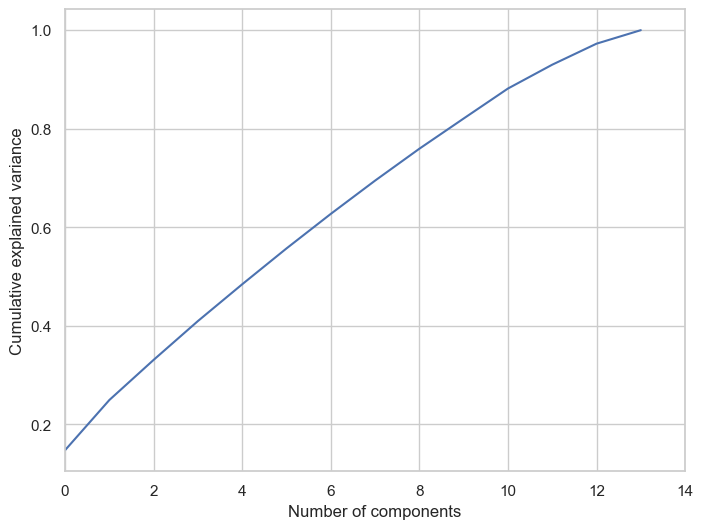

In [208]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

### Comment

The above plot shows that almost 90% of variance is explained by the first 12 components.

## Conclusion

-	In this kernel, I have discussed Principal Component Analysis – the most popular dimensionality reduction technique.
-	I have demonstrated PCA implementation with Logistic Regression on the adult dataset.
-	I found the maximum accuracy with the first 12 features and it is found to be 0.8227.
-	As expected, the number of dimensions required to preserve 90 % of variance is found to be 12.
-	Finally, I plot the explained variance ratio with number of dimensions. The graph confirms that approximately 90% of variance is explained by the first 12 components.


## References

The ideas and concepts in this kernel are taken from the following book.

- Hands on Machine Learning with Scikit-Learn and Tensorflow by Aurelien Geron.

<hr><font color="green"><h1>from file: explain-your-ml-model-no-more-black-boxes</h1></font>

# Interpret your ML model

[1. What's in a black box?](#black_box)

[2. Different types of interpretation](#types)

[3. Trade-off between Accuracy and Interpretability](#tradeoff)

[4. Feature Importance](#feature_importance)

[5. Dependency plots](#dependency_plots)

[6. Local interpretation](#local)

[7. SHAP](#shap)

[8. Practice! Explaining your ML model 🔍](#practice)

[9. Wrapping up](#wrapping_up)

[10. Great resources to learn more about interpretable ML 📚](#resources)


# <a id='black_box'></a> 1. What's in a black box?

The more companies are interested in using machine learning and big data in their work, the more they care about the interpretability of the models. This is understandable: asking questions and looking for explanations is human. 

We want to know not only "What's the prediction?", but "Why so?" as well. Thus, interpretation of ML models is important and helps us to:

   - Explain individual predictions
   - Understand models' behaviour
   - Detect errors & biases
   - Generate insights about data & create new features
   
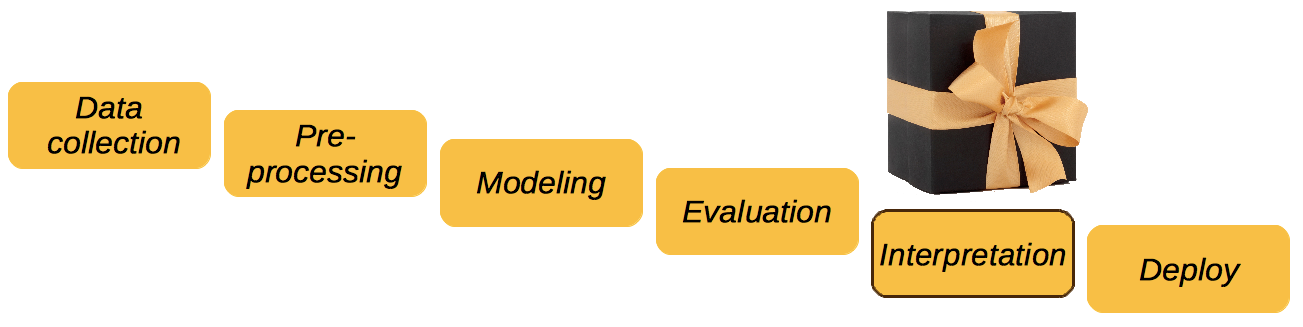

# <a id='types'></a> 2. Different types of interpretation

Model's predictions can be explained in different ways. The choice of media relies on what would be the most appropriate for a given problem.

## <font color='purple'> Visualization
    
For example, visualized interpretations are perfect for explaining the image classifier predictions.    
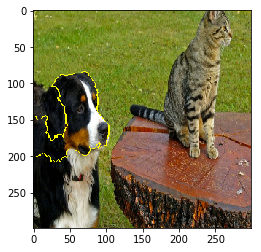

Source: [LIME Tutorial](https://marcotcr.github.io/lime/tutorials/Tutorial%20-%20images.html)

## <font color='purple'> Textual description

A brief text explanations is also an option.    
    
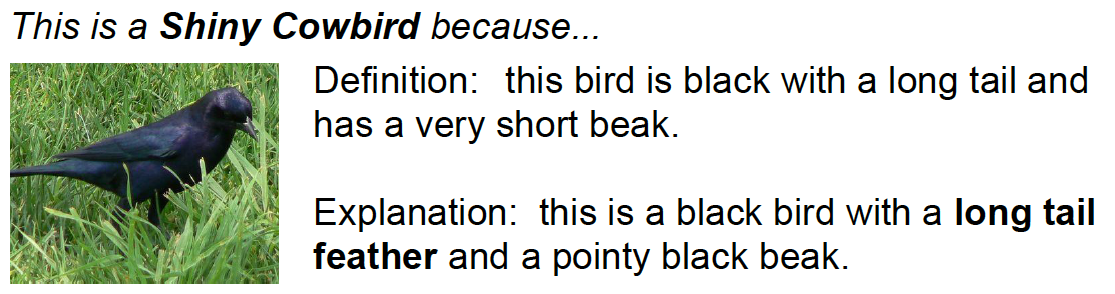
    
Source: [Generating Visual Explanations](https://arxiv.org/pdf/1603.08507.pdf)

## <font color='purple'> Formulae
And sometimes an old, good formula is worth a thousand of words:    

House price = $\$2800 * room + \$10000 * {swimming pool} + \$5000 * garage$

# <a id='tradeoff'></a> 3. Trade-off between Accuracy and Interpretability

The thing is that not all kinds of machine learning models are equally interpretable. As a rule, more accurate and advanced algorithms, e.g. neural networks, are hard to explain. Imagine making sense of all these layers' weights!

Thus, it is a job of a data scientist to:
1. Find a trade-off between accuracy and interpretability.

    One may use a linear regression which predictions are easy to explain. But the price for a high interpretability may be a lower metric as compared to a more complicated boosting.

2. Explain a choice of a particular algorightm to a client.

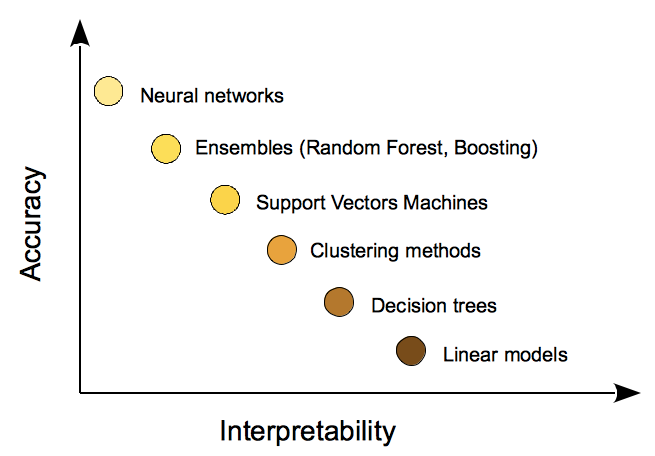


# <a id='feature_importance'></a> 4. Feature importance
Feature importance helps to answer the question "**What features** affect the model's prediction?"

One of the methods used to estimate the importance of features is Permutation importance.

*Idea*: if we permute the values of an important feature, the data won't reflect the real world anymore and the accuracy of the model will go down.

The method work as follows:

- Train the model 
- Mix up all values of the feature `X`. Make a prediction on an updated data.
- Compute $Importance(X) = Accuracy_{actual} - Accuracy_{permutated}$.
- Restore the actual order of the feature's values. Repeat steps 2-3 with a next feature.


**Advantages:**
- Concise global explanation of the model's behaviour.
- Easy to interpret.
- No need to re-train a model again and again.

**Disadvantages:**
- Need the ground truth values for the target.
- Connection to a model's error. It's not always bad, simply not something we need in some cases.

    Sometimes we want to know how much the prediction will change depending on the feature's value without taking into account how much the metric will change.

# <a id='dependency_plots'></a> 5. Dependency plots

Partial Dependency Plots will help you to answer the question "**How** does the feature affect the predictions?"
PDP provides a quick look on the global relationship between the feature and the prediction. The plot below shows that the more money is at one's bank account, the higher the probability of one signing a term deposit during [a bank campaign](http://https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).



Let's look at how this plot is created:
1. Take one sample: a single student, no loans, balance is around \$1000.
2. Increase the latter feature up to 5000.
3. Make a prediction on an updated sample.
4. What is the model output if `balance==10`? And so on.
5. Moving along the x axis, from smaller to larger values, plot the resulting predictions on the y axis.

Now, we considered only one sample. To create a PDP, we need to repeat this procedure for all the samples, i.e. all the rows in our dataset, and then draw the average prediction.

**Advantages:**
- Easy to interpret
- Enables the interpretation of causality

**Disadvantages:**
- One plot can give you the analysis of only one or two features. Plots with more features would be difficult for humans to comprehend.
- An assumption of the independent features. However, this assumption is often violated in real life. 

    Why is this a problem? Imagine that we want to draw a PDP for the data with correlated features. While we change the values of one feature, the values of the related feature stay the same. As a result, we can get unrealistic data points. For instance, we are interested in the feature `Weight`, but the dataset also contains such a feature as `Height`. As we change the value of `Weight`, the value of `Height` is fixed so we can end up having a sample with `Weight==200 kg` and `Height==150 cm`.
- Opposite effects can cancel out the feature's impact.
    
    Imagine that a half of the values of a particular feature is positively correlated with the target: the higher the value, the higher the model's outcome. On the other hand, a half of the values is negatively correlated with the target: the lower the feature's value, the higher the prediction. In this case, a PDP may be a horizontal line since the positive effects got cancelled out by the negative ones.


# <a id='local'></a> 6. Local interpretation

For now, we have considered two methods of global interpretation: feature importance and dependecy plots. These approaches help us to explain our model's behaviour, well, at a global level which is surely nice. However, we often need to explain a particular prediction for an individual sample. To achieve this goal, we may turn to local interpretation. One technique that can be used here is [LIME, Local Interpretable Model-agnostic Explanations](https://github.com/marcotcr/lime) 

The idea is as follows: instead of interpreting predictions of the black box we have at hand, we create a local surrogate model which is interpretable by its nature (e.g. a linear regression or a decision tree), use it to predict on an interesting data point and finally explain the prediction.

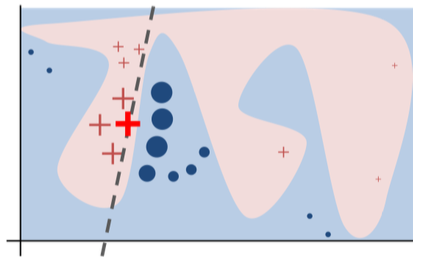

On the picture above, the prediction to explain is a big red cross. Blue and pink areas represent the complex decision function of the black box model. Surely, this cannot be approximated by a linear model. However, as we see, the dashed line that represents the learned explanation is locally faithful.

Source: [Why Should I Trust You?](https://arxiv.org/pdf/1602.04938.pdf)

**Advantages:**
- Concise and clear explanations.
- Compatible with most of data types: texts, images, tabular data.
- The speed of computation as we focus on one sample at a time.

**Disadvantages:**
- Only linear models are used to approximate the model's local behaviour.
- No global explanations.

# <a id='shap'></a> 7. SHAP

[SHapley Additive exPlantions (SHAP)](https://github.com/slundberg/shap) is an method based on the concept of the Shapley values from the game theory.

Idea: a feature is a "player", a prediction is a "gain". Then the Shapley value is the contribution of a feature averaged over all possible combinations of a "team":


$$\phi_i(v) = \sum_{ S \subseteq N \setminus \lbrace i \rbrace } {{|S| ! ( N - |S| - 1 )!} \over {N!}} ( v( S \cup \lbrace i \rbrace) - v( S ))$$


$N$ - all players.

$S$ - the "team" of $N$ players.

$v(S)$ - the gain of $S$.

$v( S \cup \lbrace i \rbrace) - v(S)$ - the "player's" contribution when joining $S$.

**Advantages:**
- Global and local interpretation.
- Intuitively clear local explanations: the prediction is represented as a game outcome where the features are the team players.

**Disadvantages:**
- Shap returns only one value for each feature, not an interpretable model as LIME does.
- Slow when creating a global interpretation.


# <a id='practice'></a> 8. Practice! Explaining your ML model 🔍

## Loading data

Our __task__ is to predict whether a person earns more than 50,000$ a year.

In [347]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
#import pdpbox, lime, shap, eli5
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek

#%matplotlib inline

In [349]:
#pip install --upgrade scikit-learn imbalanced-learn

In [351]:
import pdpbox

In [353]:
#pip install eli5

In [355]:
import lime

In [357]:
import shap

In [359]:
#pip install pdpbox

In [361]:
import eli5

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (C:\Users\ashis\anaconda3\Lib\site-packages\sklearn\utils\metaestimators.py)

In [236]:
#pip install lime

In [242]:
#pip install shap

In [363]:
data = pd.read_csv('data/adult.csv')
data.shape

(32561, 15)

In [365]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [367]:
data.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

## Data Preprocessing and Modeling

Since we are going to tackle this case as a classification problem, let's encode the variable `income` into a binary target.

In [370]:
data['target']=data['income'].map({'<=50K':0,'>50K':1})
data.drop("income",axis=1,inplace=True)
data['target'].value_counts()

target
0    24720
1     7841
Name: count, dtype: int64

In [372]:
# Let's drop "education.num" feature. We will use one-hot encoding instead.
data.drop("education.num",axis=1,inplace=True)

In [374]:
# Since this example is for educational purposes, we'll also drop 'native-country' feature to decrease our data dimensionality.
data.drop('native.country',axis=1,inplace=True)

In [376]:
# Now we will encode categorical features using one-hot encoding, i.e. each category will now be represented by a separate column
# containing only 0 and 1, depending on whether this category is relevant in a sample (row in our data) 
data=pd.get_dummies(data, drop_first = True)

In [378]:
data.head()

age  fnlwgt  capital.gain  capital.loss  hours.per.week  target  \
0   90   77053             0          4356              40       0   
1   82  132870             0          4356              18       0   
2   66  186061             0          4356              40       0   
3   54  140359             0          3900              40       0   
4   41  264663             0          3900              40       0   

   workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                  False                False                   False   
1                  False                False                   False   
2                  False                False                   False   
3                  False                False                   False   
4                  False                False                   False   

   workclass_Private  ...  relationship_Not-in-family  \
0              False  ...                        True   
1               True  ...                        True   
2              False  ...                       False   
3               True  ...                       False   
4               True  ...                       False   

   relationship_Other-relative  relationship_Own-child  \
0                        False                   False   
1                        False                   False   
2                        False                   False   
3                        False                   False   
4                        False                    True   

   relationship_Unmarried  relationship_Wife  race_Asian-Pac-Islander  \
0                   False              False                    False   
1                   False              False                    False   
2                    True              False                    False   
3                    True              False                    False   
4                   False              False                    False   

   race_Black  race_Other  race_White  sex_Male  
0       False       False        True     False  
1       False       False        True     False  
2        True       False       False     False  
3       False       False        True     False  
4       False       False        True     False  

[5 rows x 59 columns]

Let's split our data into train and test in proportions 70/30. We will also fix ```random_state``` for reproducability and use `stratify` to preserve the same class distribution.

In [381]:
y = data['target'].values
features = [col for col in data.columns if col not in ['target']]
X = data[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(22792, 58) (22792,)
(9769, 58) (9769,)


In [383]:
model = RandomForestClassifier(random_state=1).fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy: %.2f" %accuracy_score(y_test, y_pred))
print("Recall: %.2f" %recall_score(y_test, y_pred))

Accuracy: 0.86
Recall: 0.62


### Explore what features are important for the model. 

Here we are going to use permutation feature importance.

In [44]:
import eli5
from eli5.sklearn import PermutationImportance

imp = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(imp, feature_names = X_test.columns.tolist())

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (C:\Users\ashis\anaconda3\Lib\site-packages\sklearn\utils\metaestimators.py)

In [394]:
from sklearn.inspection import permutation_importance

# Assuming 'model' is your trained model and 'X_test', 'y_test' are your test data
results = permutation_importance(model, X_test, y_test, scoring='accuracy')

# Extract feature importances
importances = results.importances_mean

# Print feature importances
for i, v in enumerate(importances):
    print(f"Feature: {i}, Importance: {v}")

# Optionally, sort and plot
import matplotlib.pyplot as plt
sorted_idx = importances.argsort()

plt.barh(range(X_test.shape[1]), importances[sorted_idx], align='center')
plt.yticks(range(X_test.shape[1]), X_test.columns[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")
plt.show()



ImportError: cannot import name '_approximate_mode' from 'sklearn.utils.extmath' (C:\Users\ashis\anaconda3\Lib\site-packages\sklearn\utils\extmath.py)

In [386]:
#pip install --upgrade scikit-learn

Feature: 0, Importance: 0.15874925639883075
Feature: 1, Importance: 0.16866586173657594
Feature: 2, Importance: 0.10237062564718032
Feature: 3, Importance: 0.036249614401217885
Feature: 4, Importance: 0.0853468041113104
Feature: 5, Importance: 0.0057539950318491045
Feature: 6, Importance: 0.006709524863270349
Feature: 7, Importance: 6.091666161807876e-06
Feature: 8, Importance: 0.012171425924527128
Feature: 9, Importance: 0.006646436205510779
Feature: 10, Importance: 0.009142552976319133
Feature: 11, Importance: 0.004940368451060083
Feature: 12, Importance: 4.794301721893172e-05
Feature: 13, Importance: 0.0038551044604054653
Feature: 14, Importance: 0.001532789012157464
Feature: 15, Importance: 0.0005898951116804201
Feature: 16, Importance: 0.0014358228163703656
Feature: 17, Importance: 0.004275637433754204
Feature: 18, Importance: 0.002231909929592637
Feature: 19, Importance: 0.003985791053285098
Feature: 20, Importance: 0.004788947408380879
Feature: 21, Importance: 0.0238640450768119

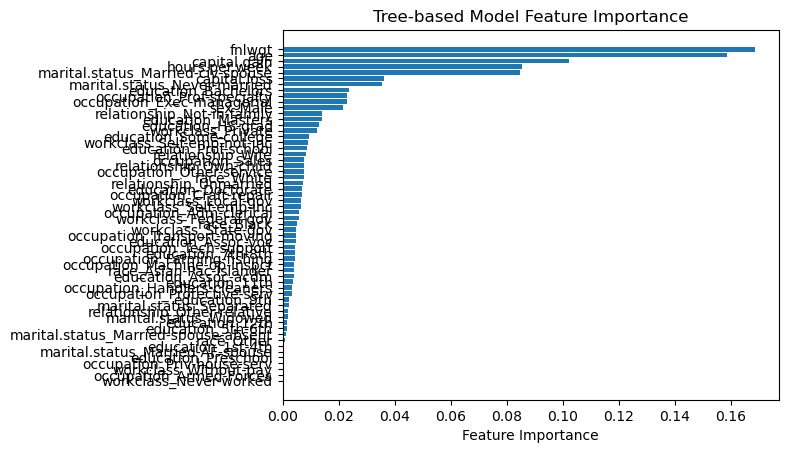

In [388]:
# For tree-based models like RandomForest or DecisionTree
importances = model.feature_importances_

# Print feature importances
for i, v in enumerate(importances):
    print(f"Feature: {i}, Importance: {v}")

# Optionally, sort and plot
import matplotlib.pyplot as plt
sorted_idx = importances.argsort()

plt.barh(range(X_test.shape[1]), importances[sorted_idx], align='center')
plt.yticks(range(X_test.shape[1]), X_test.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Tree-based Model Feature Importance")
plt.show()


In [82]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test) 

KeyboardInterrupt: 

In [392]:
from lime.lime_tabular import LimeTabularExplainer

# Define the explainer
explainer = LimeTabularExplainer(X_test.values, feature_names=X_test.columns, class_names=['class1', 'class2'], verbose=True, mode='classification')

# Explain a single instance
i = 0  # Index of the instance to explain
exp = explainer.explain_instance(X_test.values[i], model.predict_proba, num_features=5)

# Show the explanation
exp.show_in_notebook(show_table=True)


Intercept 0.7038585351240241
Prediction_local [0.20259054]
Right: 0.25


In [390]:
import numpy as np

# Assuming the model is a linear model like LogisticRegression or LinearRegression
coefficients = model.coef_.flatten()  # For logistic regression

# Print feature importances
for i, v in enumerate(coefficients):
    print(f"Feature: {i}, Coefficient: {v}")

# Optionally, sort and plot
sorted_idx = np.argsort(np.abs(coefficients))

import matplotlib.pyplot as plt
plt.barh(range(X_test.shape[1]), coefficients[sorted_idx], align='center')
plt.yticks(range(X_test.shape[1]), X_test.columns[sorted_idx])
plt.xlabel("Coefficient Magnitude")
plt.title("Linear Model Feature Importance")
plt.show()


AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'

Feature: 0, Importance: 0.15874925639883075
Feature: 1, Importance: 0.16866586173657594
Feature: 2, Importance: 0.10237062564718032
Feature: 3, Importance: 0.036249614401217885
Feature: 4, Importance: 0.0853468041113104
Feature: 5, Importance: 0.0057539950318491045
Feature: 6, Importance: 0.006709524863270349
Feature: 7, Importance: 6.091666161807876e-06
Feature: 8, Importance: 0.012171425924527128
Feature: 9, Importance: 0.006646436205510779
Feature: 10, Importance: 0.009142552976319133
Feature: 11, Importance: 0.004940368451060083
Feature: 12, Importance: 4.794301721893172e-05
Feature: 13, Importance: 0.0038551044604054653
Feature: 14, Importance: 0.001532789012157464
Feature: 15, Importance: 0.0005898951116804201
Feature: 16, Importance: 0.0014358228163703656
Feature: 17, Importance: 0.004275637433754204
Feature: 18, Importance: 0.002231909929592637
Feature: 19, Importance: 0.003985791053285098
Feature: 20, Importance: 0.004788947408380879
Feature: 21, Importance: 0.0238640450768119

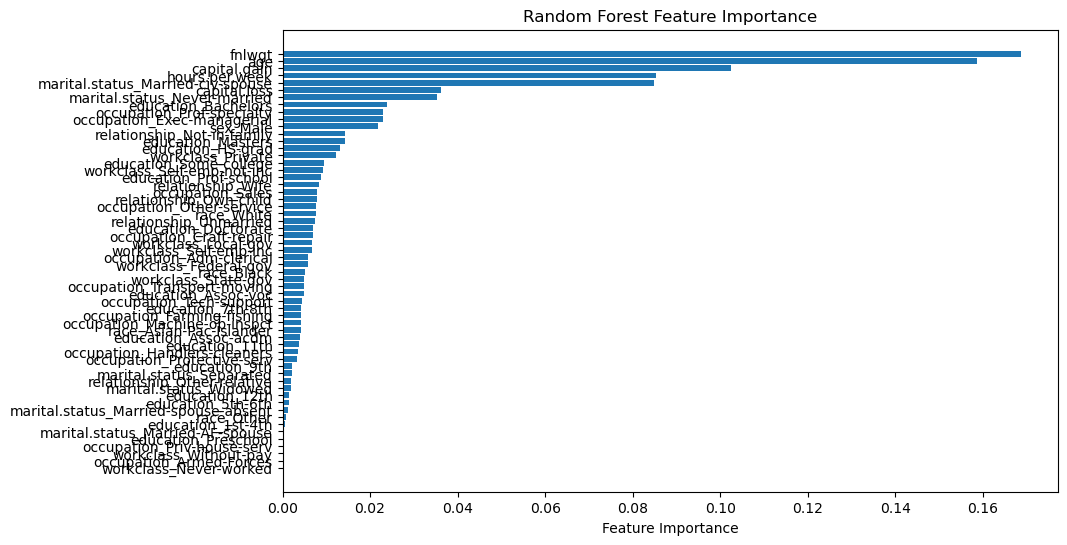

In [396]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the RandomForestClassifier
importances = model.feature_importances_

# Print feature importances
for i, v in enumerate(importances):
    print(f"Feature: {i}, Importance: {v}")

# Sort and plot the feature importances
sorted_idx = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_idx], align='center')
plt.yticks(range(len(importances)), X_test.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


In [ ]:
#pip install tf-keras

In [85]:
#pip install tf-keras

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

imp = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(imp, feature_names = X_test.columns.tolist())
ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (C:\Users\ashis\anaconda3\Lib\site-packages\sklearn\utils\metaestimators.py)

In [48]:
#pip install alibi

In [50]:
from alibi.explainers import PermutationImportance

# Instantiate and fit the Permutation Importance explainer
perm = PermutationImportance(predictor=model.predict, feature_names=X_test.columns.tolist())
explanation = perm.explain(X_test, y_test)

# Display results
print(explanation.feature_importance)

ValueError: At least one loss function or a score function must be provided.

In [52]:
from alibi.explainers import PermutationImportance
from sklearn.metrics import accuracy_score

# Define the score function (accuracy for classification)
def score_fn(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

# Instantiate and fit the Permutation Importance explainer
perm = PermutationImportance(predictor=model.predict, score_fn=score_fn, feature_names=X_test.columns.tolist())

# Explain the importance of each feature
explanation = perm.explain(X_test, y_test)

# Display the results
print(explanation.feature_importance)

TypeError: PermutationImportance.__init__() got an unexpected keyword argument 'score_fn'

In [54]:
from alibi.explainers import PermutationImportance
from sklearn.metrics import accuracy_score

# Define the loss function (negative accuracy for classification)
def loss_fn(y_true, y_pred):
    return -accuracy_score(y_true, y_pred)

# Instantiate and fit the Permutation Importance explainer
perm = PermutationImportance(predictor=model.predict, loss_fn=loss_fn, feature_names=X_test.columns.tolist())

# Explain the importance of each feature
explanation = perm.explain(X_test, y_test)

# Display the results
print(explanation.feature_importance)

TypeError: PermutationImportance.__init__() got an unexpected keyword argument 'loss_fn'

In [56]:
from alibi.explainers import PermutationImportance
from sklearn.metrics import accuracy_score

# Define the loss function (negative accuracy for classification)
def loss_fn(y_true, y_pred):
    return -accuracy_score(y_true, y_pred)

# Instantiate the Permutation Importance explainer (no loss function or score function here)
perm = PermutationImportance(predictor=model.predict, feature_names=X_test.columns.tolist())

# Explain the importance of each feature (pass loss_fn here)
explanation = perm.explain(X_test, y_test, loss_fn=loss_fn)

# Display the results
print(explanation.feature_importance)

ValueError: At least one loss function or a score function must be provided.

In [58]:
from alibi.explainers import PermutationImportance
from sklearn.metrics import accuracy_score

# Define the loss function (negative accuracy for classification)
def loss_fn(y_true, y_pred):
    # Convert predicted probabilities to predicted class labels
    y_pred_labels = y_pred.argmax(axis=1)
    return -accuracy_score(y_true, y_pred_labels)

# Instantiate the Permutation Importance explainer
perm = PermutationImportance(predictor=model.predict_proba, feature_names=X_test.columns.tolist())

# Explain the importance of each feature (pass loss_fn here)
explanation = perm.explain(X_test, y_test, loss_fn=loss_fn)

# Display the results
print(explanation.feature_importance)

ValueError: At least one loss function or a score function must be provided.

In [60]:
from alibi.explainers import PermutationImportance
from sklearn.metrics import accuracy_score

# Define the loss function (negative accuracy for classification)
def loss_fn(y_true, y_pred):
    # If the output is probabilities, convert them to predicted class labels
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred_labels = y_pred.argmax(axis=1)
    else:
        y_pred_labels = y_pred
    # Return negative accuracy
    return -accuracy_score(y_true, y_pred_labels)

# Instantiate the Permutation Importance explainer
perm = PermutationImportance(predictor=model.predict_proba, feature_names=X_test.columns.tolist())

# Explain the importance of each feature (pass loss_fn here)
explanation = perm.explain(X_test, y_test, loss_fn=loss_fn)

# Display the results
print(explanation.feature_importance)

ValueError: At least one loss function or a score function must be provided.

In [62]:
from alibi.explainers import PermutationImportance
from sklearn.metrics import accuracy_score

# Define the score function (accuracy for classification)
def score_fn(y_true, y_pred):
    # If the output is probabilities, convert them to predicted class labels
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred_labels = y_pred.argmax(axis=1)
    else:
        y_pred_labels = y_pred
    # Return accuracy score
    return accuracy_score(y_true, y_pred_labels)

# Instantiate the Permutation Importance explainer
perm = PermutationImportance(predictor=model.predict_proba, feature_names=X_test.columns.tolist(), score_fn=score_fn)

# Explain the importance of each feature
explanation = perm.explain(X_test, y_test)

# Display the results
print(explanation.feature_importance)

TypeError: PermutationImportance.__init__() got an unexpected keyword argument 'score_fn'

Ok, looks like the most important feature in our case if `capital.gain`. Let's see **how** exactly it influences the target.

In [398]:
from pdpbox import pdp, get_dataset, info_plots

feat_name = 'capital.gain'
capital_gain_pdp = pdp.pdp_isolate(model=model, dataset=X_test, 
                                   model_features=X_test.columns, feature=feat_name)

pdp.pdp_plot(capital_gain_pdp, feat_name)
plt.show()

ImportError: cannot import name 'get_dataset' from 'pdpbox' (C:\Users\ashis\anaconda3\Lib\site-packages\pdpbox\__init__.py)

In [400]:
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt

# Specify the feature for which you want to plot the partial dependence
feat_name = 'capital.gain'

# Create partial dependence plot for the specified feature
# Assuming model and X_test are already defined
plot_partial_dependence(model, X_test, [feat_name], grid_resolution=50)

# Display the plot
plt.show()

ImportError: cannot import name '_approximate_mode' from 'sklearn.utils.extmath' (C:\Users\ashis\anaconda3\Lib\site-packages\sklearn\utils\extmath.py)

Unsurprisingly, our model show that there's a positive correlation: people who have some capital-gains are more probable to earn more than $50,000.

The more money a person makes, the more they work. Kind of a logical thought, right? But let's check if that's true.

In [402]:
feat_name = 'hours.per.week'

hours_per_week_pdp = pdp.pdp_isolate(model=model, dataset=X_test, 
                                   model_features=X_test.columns, feature=feat_name)

pdp.pdp_plot(hours_per_week_pdp, feat_name)
plt.show()

AttributeError: module 'pdpbox.pdp' has no attribute 'pdp_isolate'

Well, actually this logic is totally wrong. The plots shows us the following:
- If a person works <20 hours a week, the chance of gaining \$50K is around a zero. That's plausible because it's probably a part-time job.
- The possibility of earning more than \$50K is increasing linearly when working from 20 up to 40 hours a week.
- However, working more hours won't make you richer on general. This could be explained by the fact that those extra hours (over standard 40) probably represent some side hastle which may be not stable. Another scenario might be that a person has several low-paying part-time jobs.  

Now let's see how we can explain individual predictions of our model. In order to do that we'll find a person earning more than \$50K from the test set and draw some plots with SHAP and LIME.

In [405]:
# check the target. 1? perfect!
y_test[69]

1

In [407]:
# taking a quick look on a sample
pd.DataFrame(X_test.iloc[69]).T

age  fnlwgt capital.gain capital.loss hours.per.week  \
2389  46  243190         7688            0             40   

     workclass_Federal-gov workclass_Local-gov workclass_Never-worked  \
2389                 False               False                  False   

     workclass_Private workclass_Self-emp-inc  ... relationship_Not-in-family  \
2389              True                  False  ...                      False   

     relationship_Other-relative relationship_Own-child  \
2389                       False                  False   

     relationship_Unmarried relationship_Wife race_Asian-Pac-Islander  \
2389                  False              True                   False   

     race_Black race_Other race_White sex_Male  
2389      False      False       True    False  

[1 rows x 58 columns]

In [409]:
# First, create a prediction on this sample
row = X_test.iloc[69]
to_predict = row.values.reshape(1, -1)

model.predict_proba(to_predict)

array([[0.07, 0.93]])

Our model predicts that this person earns more than \$50K a year with the probabiltiy over 90%. Let's find out what affected this prediction.

In [412]:
import shap 
# create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# calculate Shap values
shap_values = explainer.shap_values(row)

In [414]:
# draw a plot
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], row)

DimensionError: Length of features is not equal to the length of shap_values!

Let's read the plot above:
- Basically, the base value is the mean of the model output over the train set. This means that accoding to our model, the probability of earning more than \$50K over is on average 24%.
- The red arrows show us **what** features and **how much** "pushed" the probability for a given person to earn more than people on general. Here the capital-gain amounts for more than \$7K. Quite probable this person earns at least 50 grand a year. 
- The opposite goes for the blue arrows. Ouch, it seems like our model identified one of the trends of the job market: women earn less than men somehow. Since the model was trained on this kind of data, it identifies one's gender as one of the features affecting one's income.


Let's also create a local explanation for that prediction using LIME:

In [417]:
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_test.columns,
                                                    discretize_continuous=True)

exp = explainer.explain_instance(row, model.predict_proba, num_features=8)
exp.show_in_notebook(show_table=True)

Looks about right: capital-gain is identified as the most important feature for predicting the target as `1`.


# <a id='wrapping_up'></a> 9. Wrapping up

Hope that this notebook was useful and now you know how to turn your black box into a explainable and trustworthy model. Cheers!

**Bonus:** a quick (but totally not comprehensive!) overview of some tools for interpretable ML.

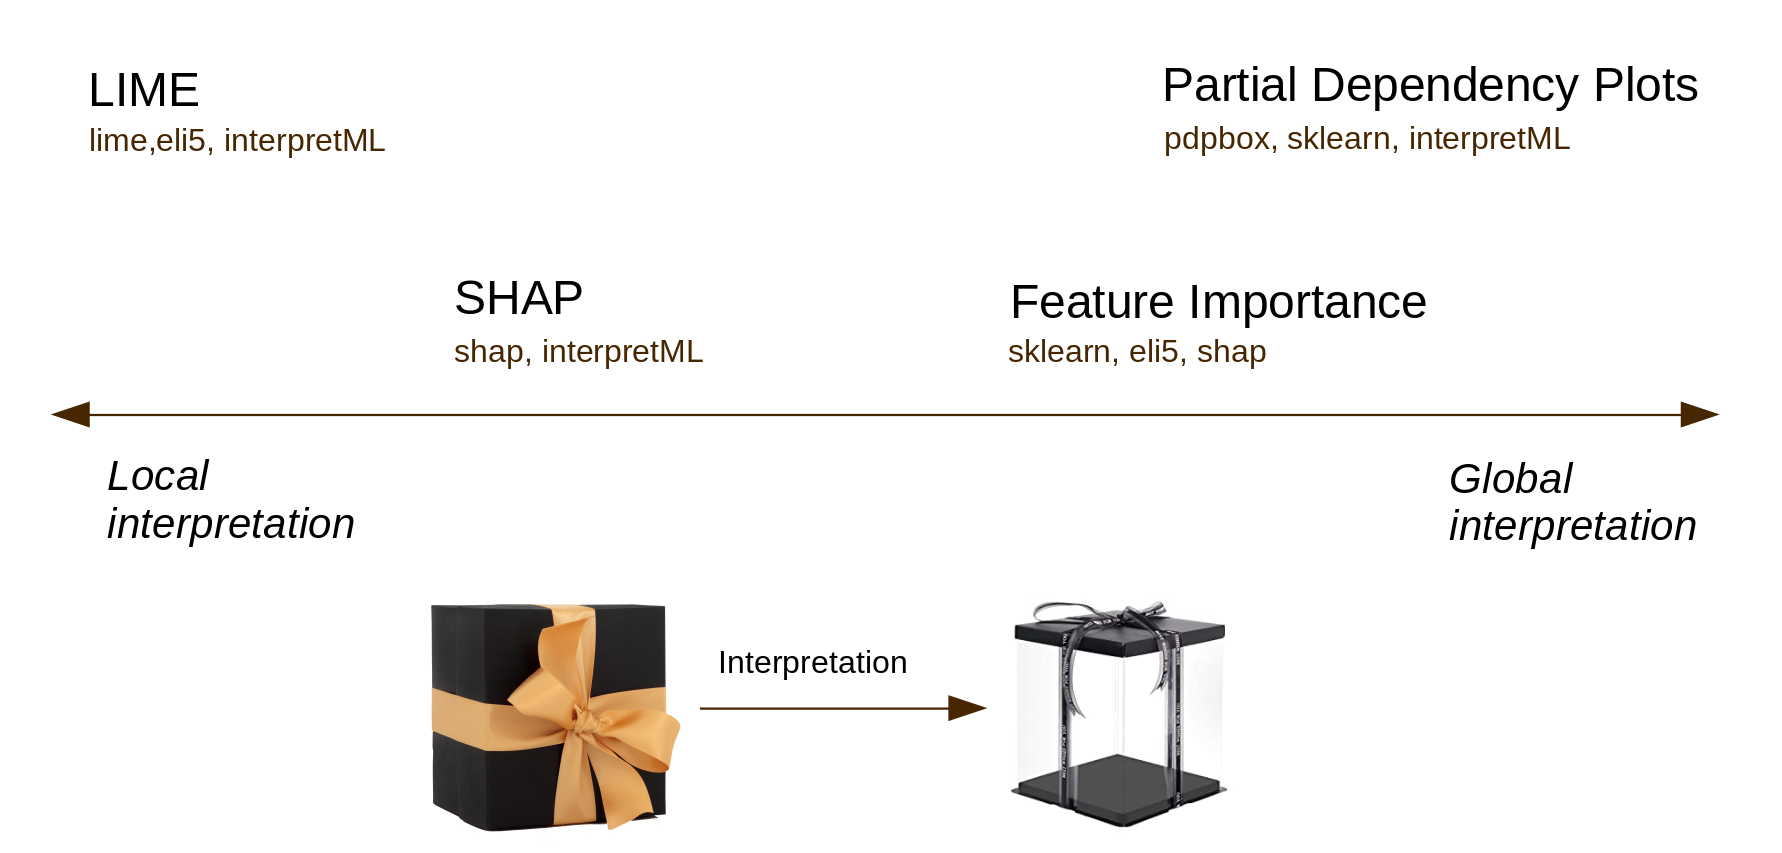

# <a id='resources'></a> 10. Great resources to learn more about interpretable ML 📚

- [Ch. Molnar, Interpretable ML book](https://christophm.github.io/interpretable-ml-book/)
- [Kaggle course by Dan Becker: Machine Learning Explainability](https://www.kaggle.com/learn/machine-learning-explainability)
- [LIME repo](https://github.com/marcotcr/lime)
- [Shap repo](https://github.com/slundberg/shap)
- [InterpretML: Open-source project by Microsoft](https://github.com/interpretml/interpret)


<hr><font color="green"><h1>from file: notebook</h1></font>

<div class="alert alert-block alert-info">

<h1 style="font-family:verdana;"> Description:</h1> 

<ul>
<li><p style="font-family:verdana;">
In this notebook, we are going to predict whether a person's income is above 50k or below 50k using various features like age, education, and occupation.
</p></li>
    
<li><p style="font-family:verdana;">
The dataset we are going to use is the Adult census income dataset from Kaggle which contains about 32561 rows and 15 features that can be downloaded <a href="https://www.kaggle.com/uciml/adult-census-income">here</a>.
</p></li> 

<li><p style="font-family:verdana;">
The dataset contains the labels which we have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type.
</p></li>  
</ul>

</div>

## Step 0: Load libraries and dataset

In [100]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [102]:
# Importing dataset
dataset = pd.read_csv('data\\adult.csv')

## Step 1: Descriptive analysis

In [105]:
# Preview dataset
dataset.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [107]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(dataset.shape[0], dataset.shape[1]))

Rows: 32561 Columns: 15


In [109]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [111]:
# Statistical summary
dataset.describe().T

count           mean            std      min       25%  \
age             32561.0      38.581647      13.640433     17.0      28.0   
fnlwgt          32561.0  189778.366512  105549.977697  12285.0  117827.0   
education.num   32561.0      10.080679       2.572720      1.0       9.0   
capital.gain    32561.0    1077.648844    7385.292085      0.0       0.0   
capital.loss    32561.0      87.303830     402.960219      0.0       0.0   
hours.per.week  32561.0      40.437456      12.347429      1.0      40.0   

                     50%       75%        max  
age                 37.0      48.0       90.0  
fnlwgt          178356.0  237051.0  1484705.0  
education.num       10.0      12.0       16.0  
capital.gain         0.0       0.0    99999.0  
capital.loss         0.0       0.0     4356.0  
hours.per.week      40.0      45.0       99.0

In [113]:
# Check for null values
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

In [115]:
# Check for '?' in dataset
round((dataset.isin(['?']).sum() / dataset.shape[0])
      * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [117]:
# Checking the counts of label categories
income = dataset['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

income
<=50K    75.92 %
>50K     24.08 %
Name: proportion, dtype: object

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
    
<li><p style="font-family:verdana;">
The dataset doesn't have any null values, but it contains missing values in the form of '?' which needs to be preprocessed.
</p></li>    

<li><p style="font-family:verdana;">
The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.
</p></li>    

</ul>

</div>

## Step 2: Exploratory Data Analysis

### 2.1: Univariate Analysis

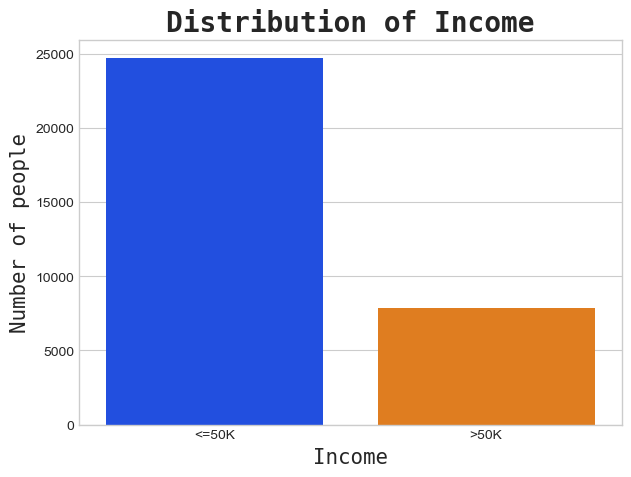

In [126]:
# Creating a barplot for 'Income'
income = dataset['income'].value_counts()

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(x=income.index,y= income.values, palette='bright')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

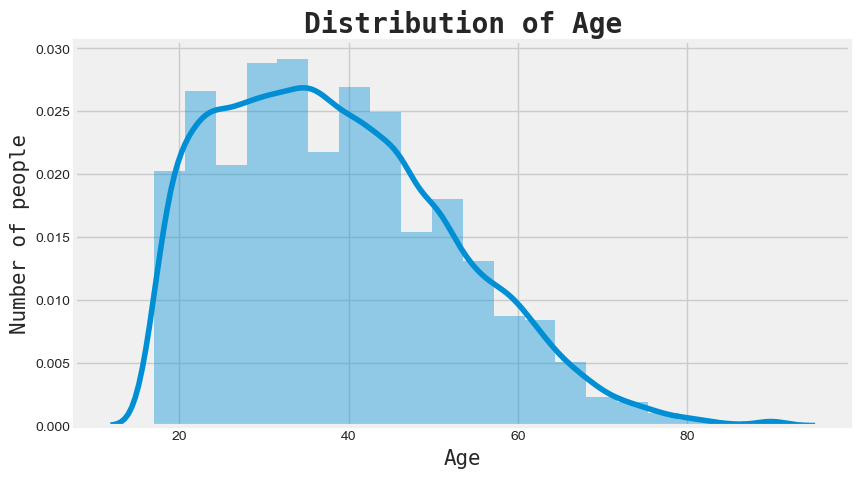

In [128]:
# Creating a distribution plot for 'Age'
age = dataset['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(dataset['age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

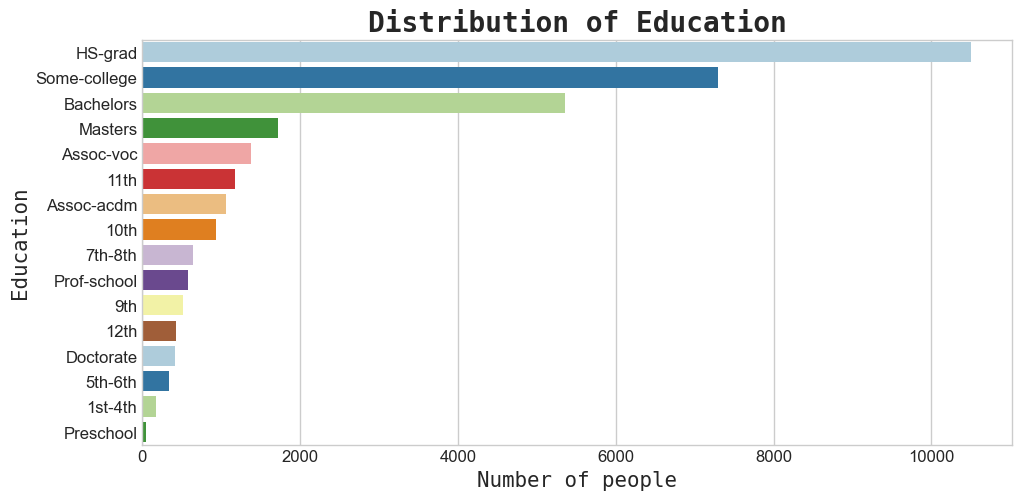

In [134]:
# Creating a barplot for 'Education'
edu = dataset['education'].value_counts()

plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 5))
sns.barplot(x=edu.values,y= edu.index, palette='Paired')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

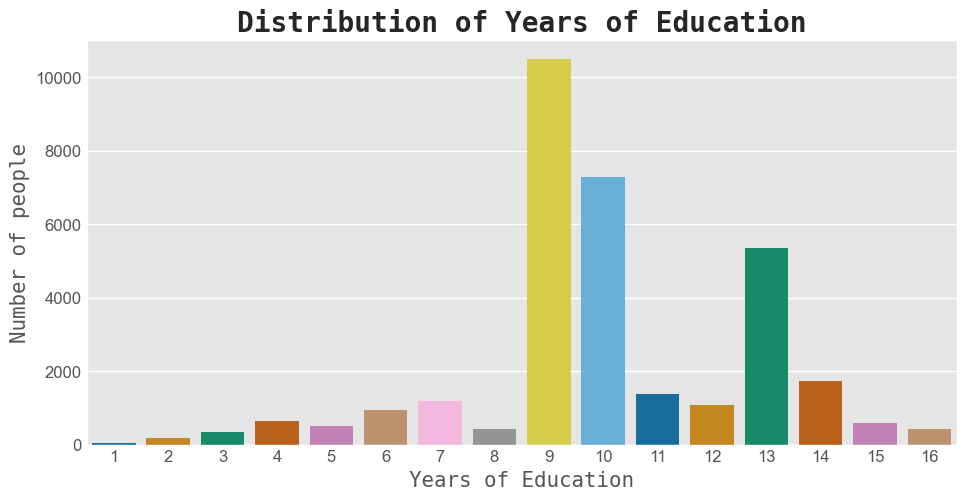

In [138]:
# Creating a barplot for 'Years of Education'
edu_num = dataset['education.num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(x=edu_num.index, y=edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

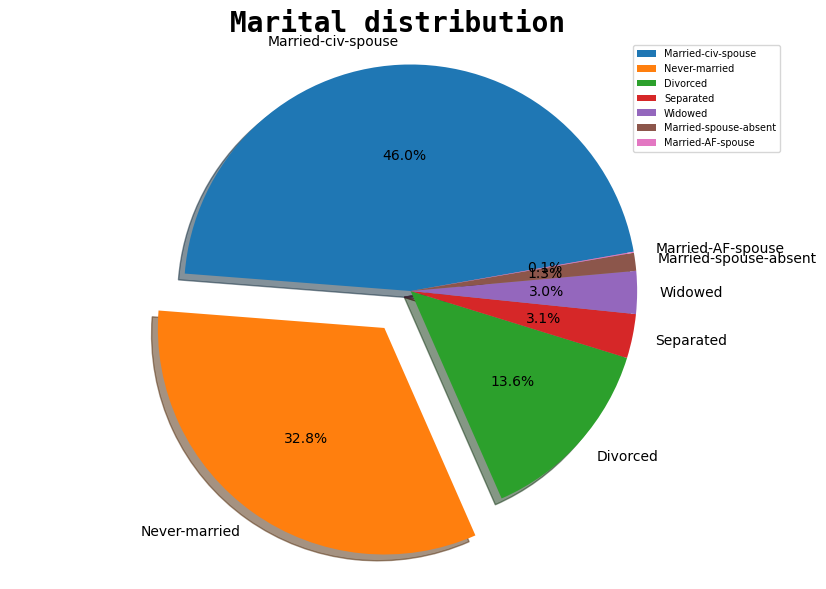

In [140]:
# Creating a pie chart for 'Marital status'
marital = dataset['marital.status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

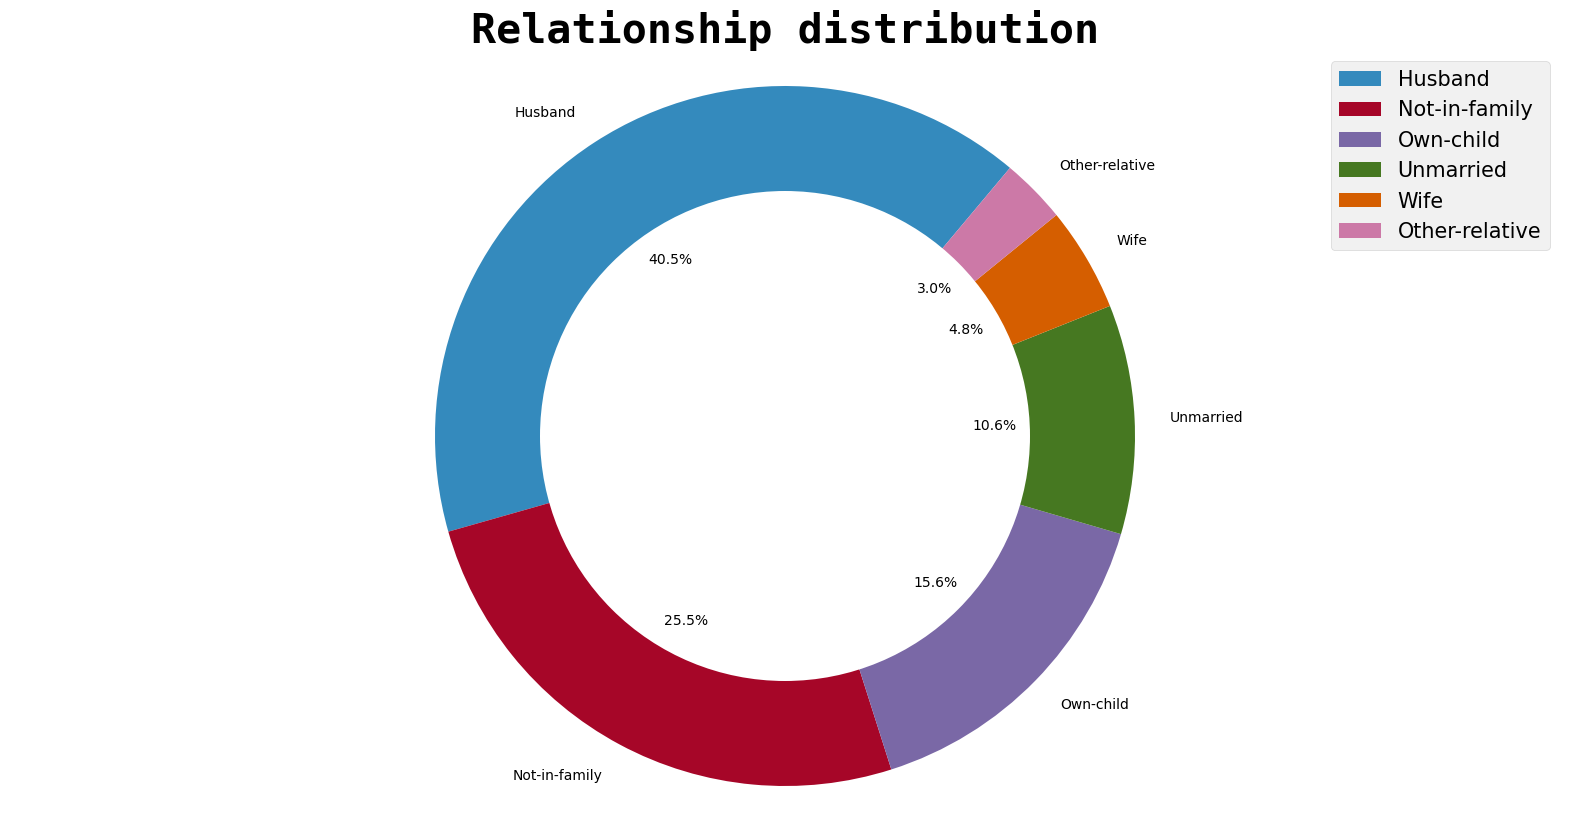

In [142]:
# Creating a donut chart for 'Age'
relation = dataset['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

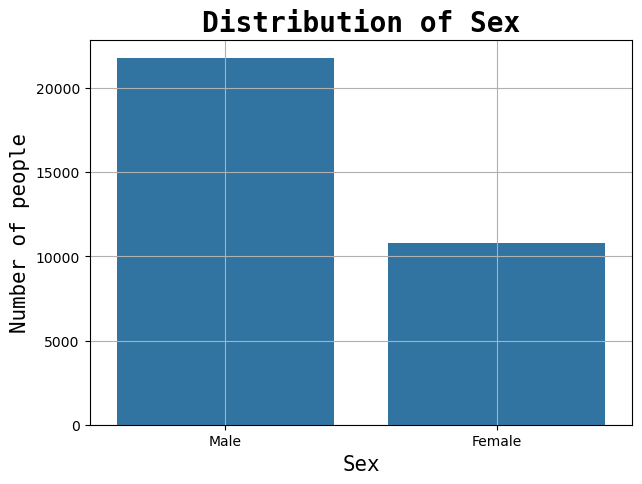

In [146]:
# Creating a barplot for 'Sex'
sex = dataset['sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(x=sex.index, y=sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

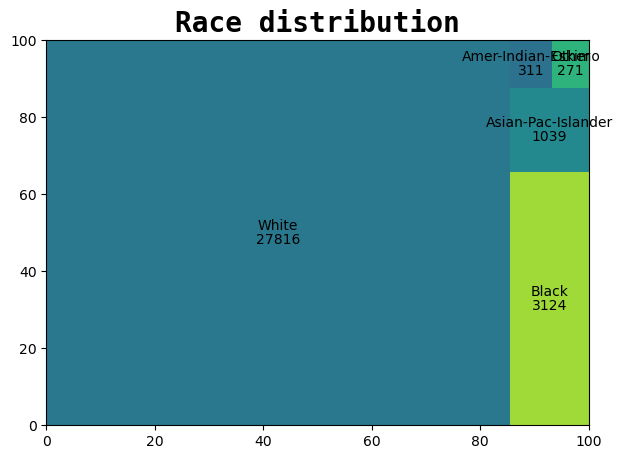

In [148]:
# Creating a Treemap for 'Race'
import squarify
race = dataset['race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
squarify.plot(sizes=race.values, label=race.index, value=race.values)
plt.title('Race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

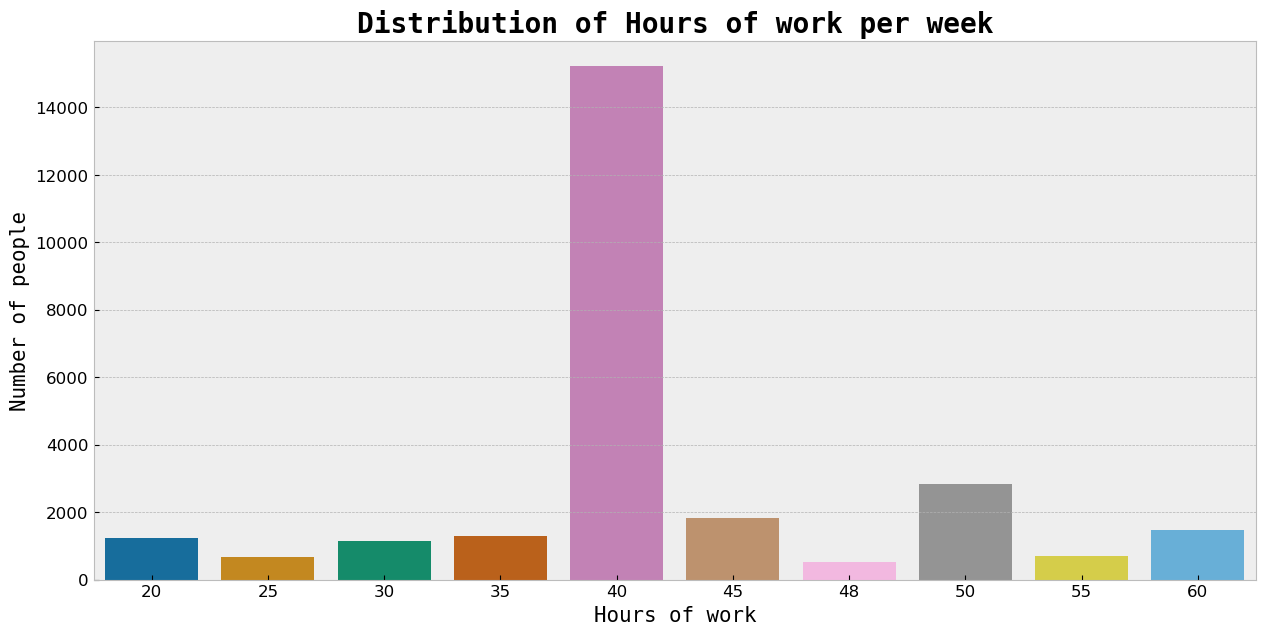

In [152]:
# Creating a barplot for 'Hours per week'
hours = dataset['hours.per.week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(x=hours.index,y= hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

### 2.2 Bivariate Analysis

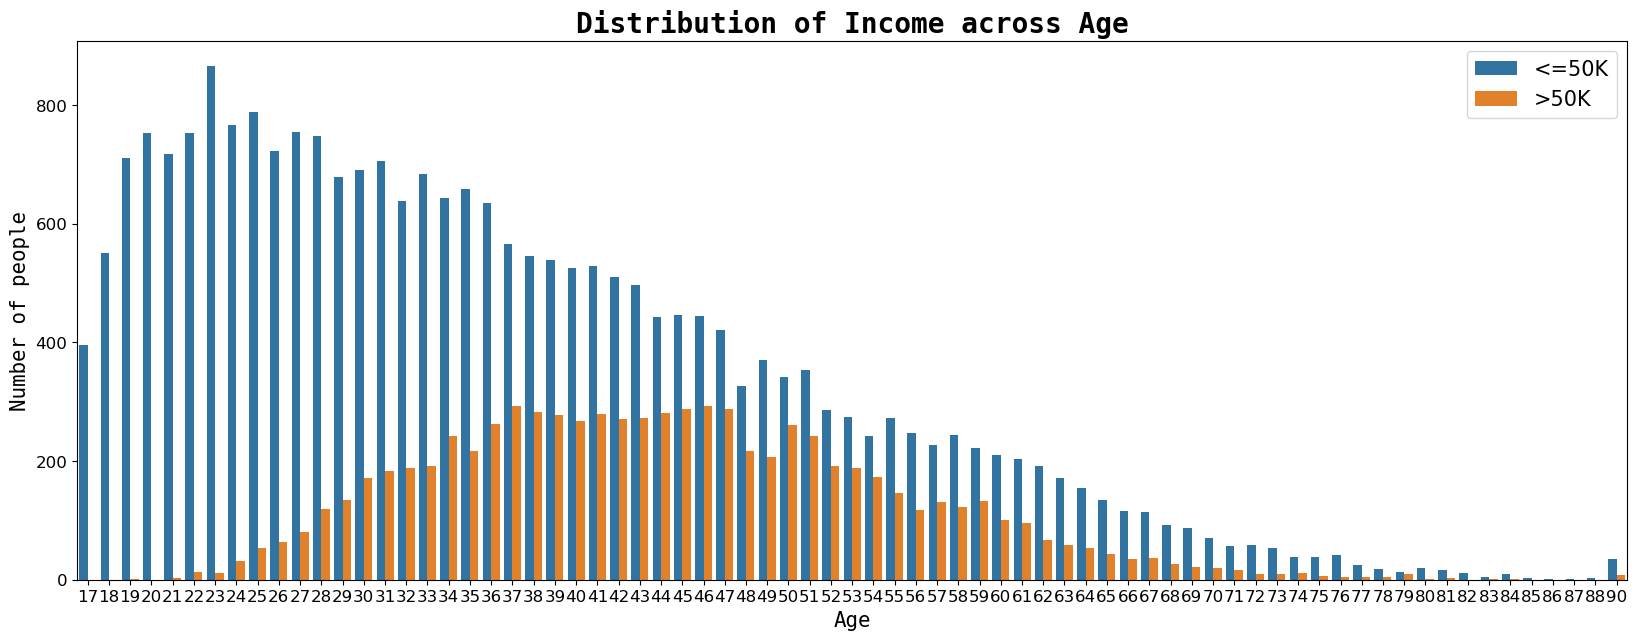

In [157]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(x=dataset['age'], hue=dataset['income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

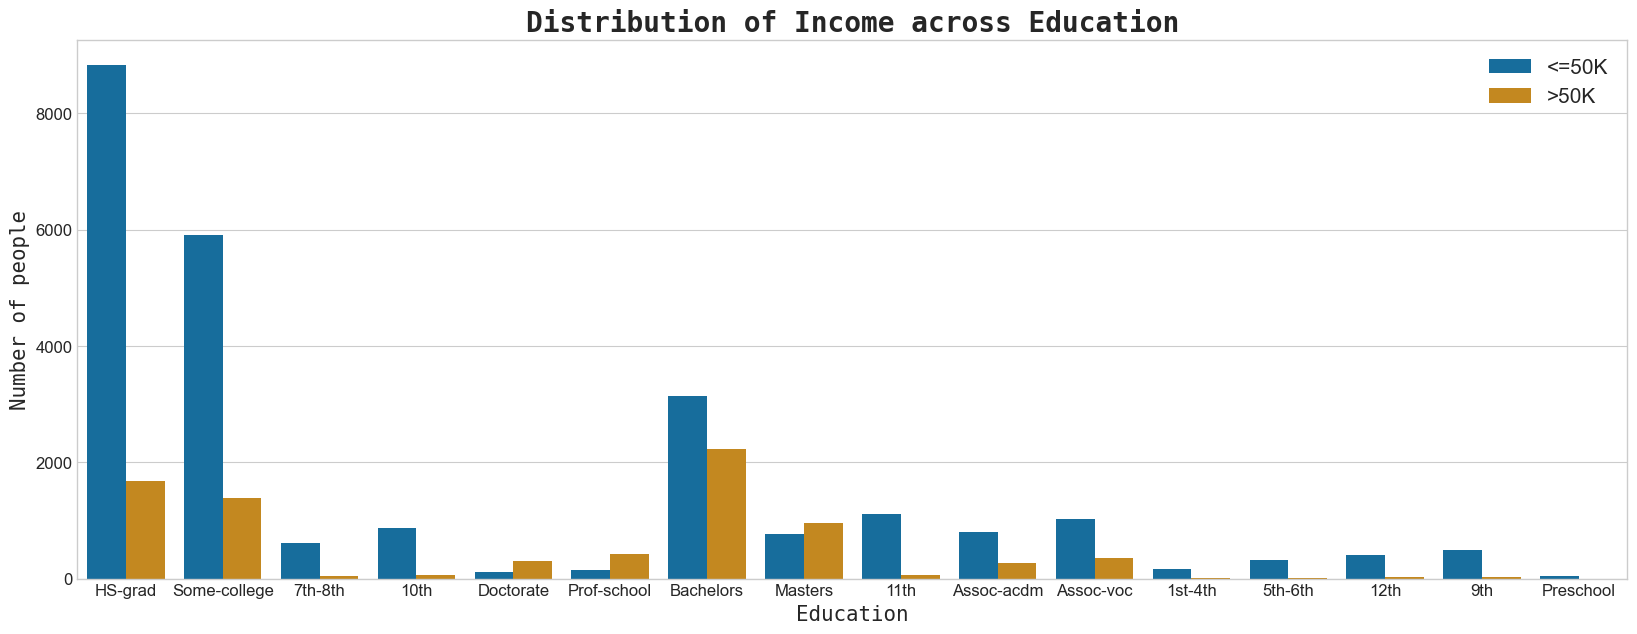

In [161]:
# Creating a countplot of income across education
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(20, 7))
sns.countplot(x=dataset['education'],
              hue=dataset['income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

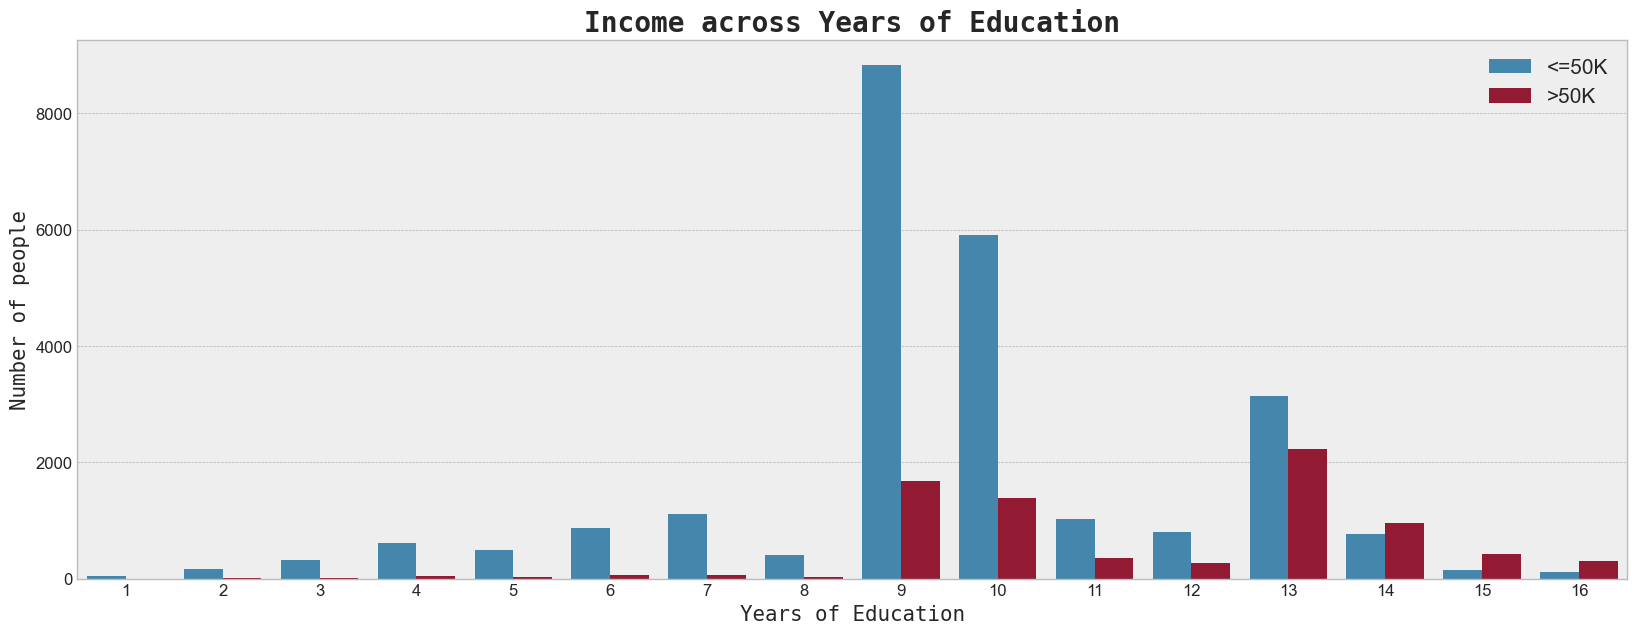

In [163]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(x=dataset['education.num'],
              hue=dataset['income'])
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()

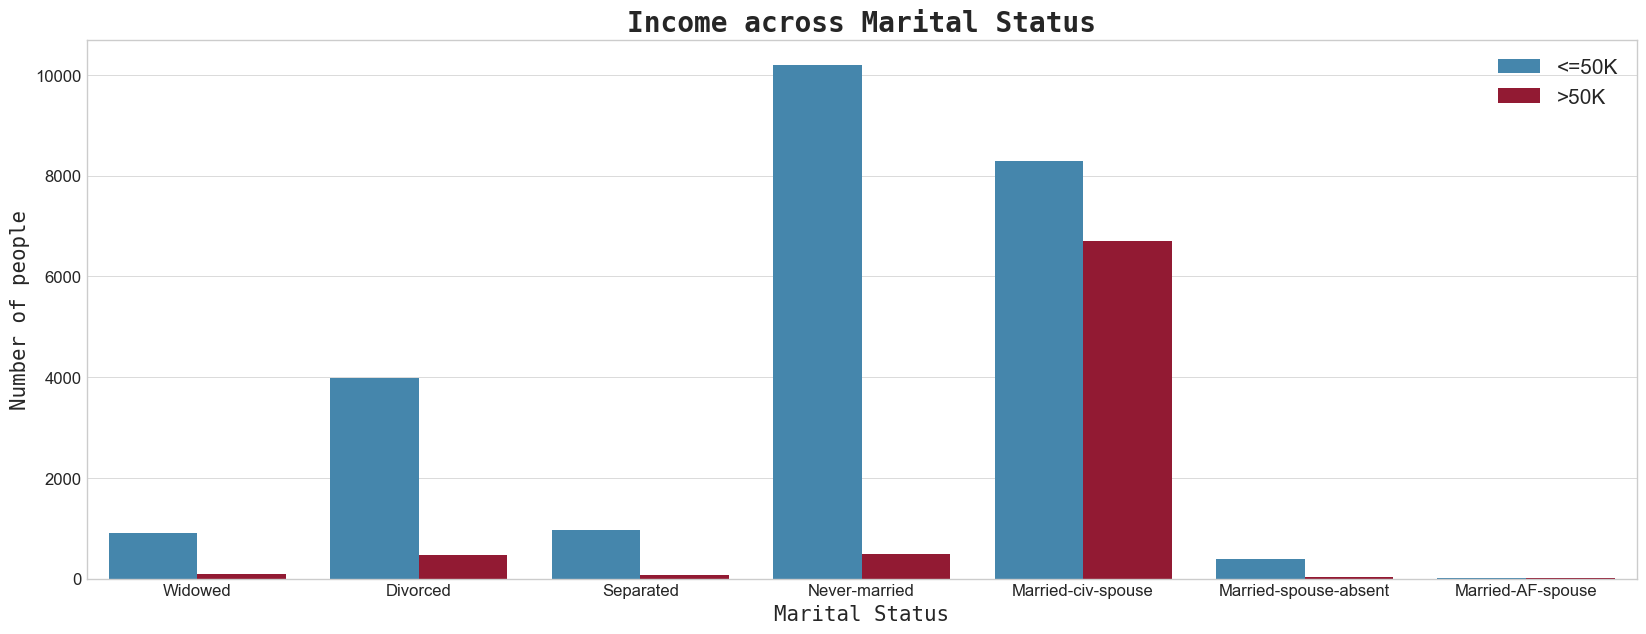

In [167]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(20, 7))
sns.countplot(x=dataset['marital.status'], hue=dataset['income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

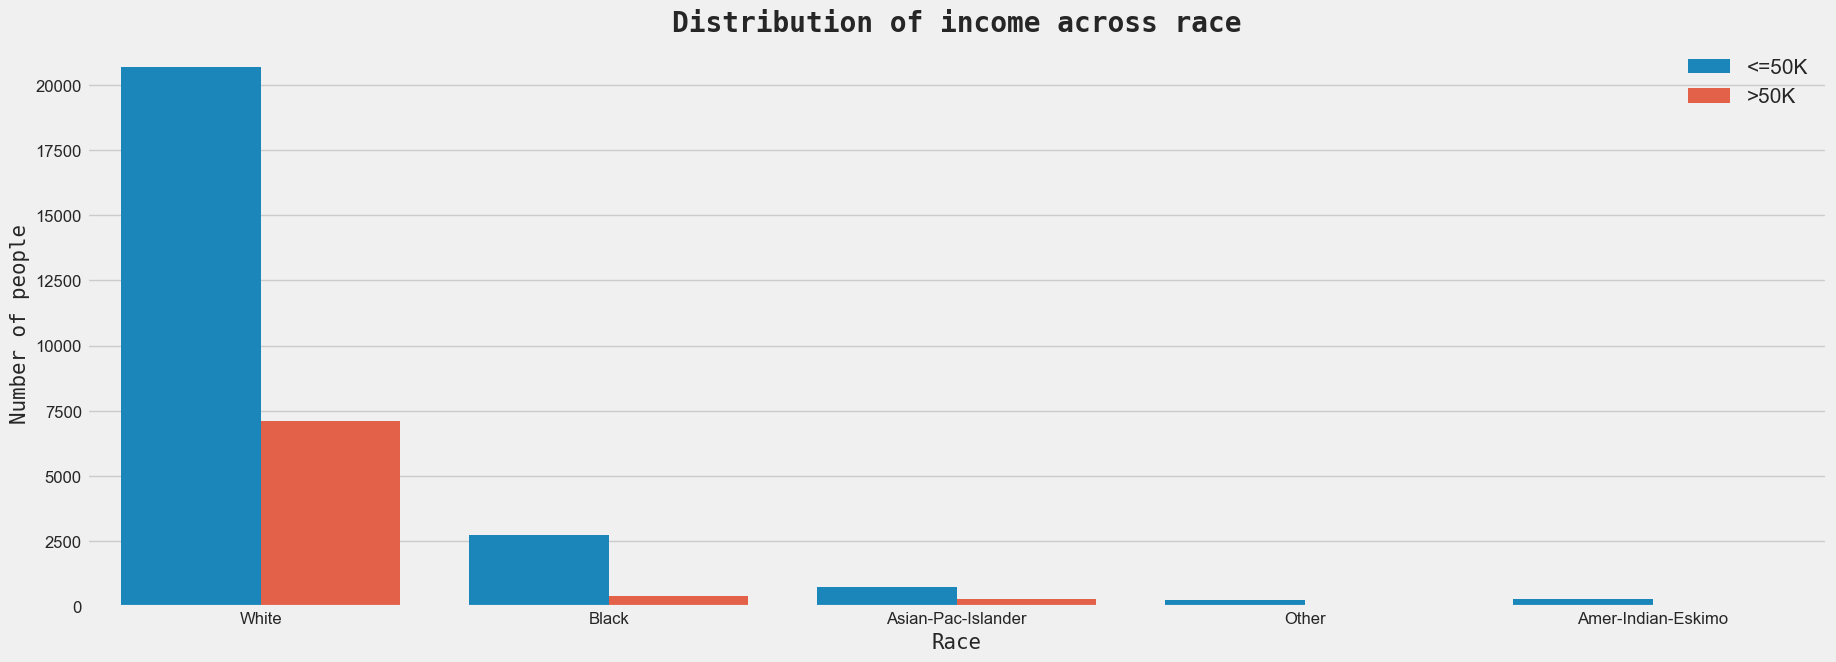

In [169]:
# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(x=dataset['race'], hue=dataset['income'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

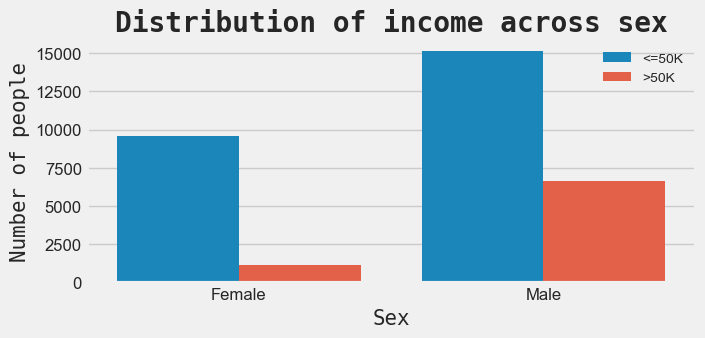

In [171]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(x=dataset['sex'], hue=dataset['income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

### 2.3: Multivariate Analysis

In [174]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [176]:
dataset['income'] = le.fit_transform(dataset['income'])

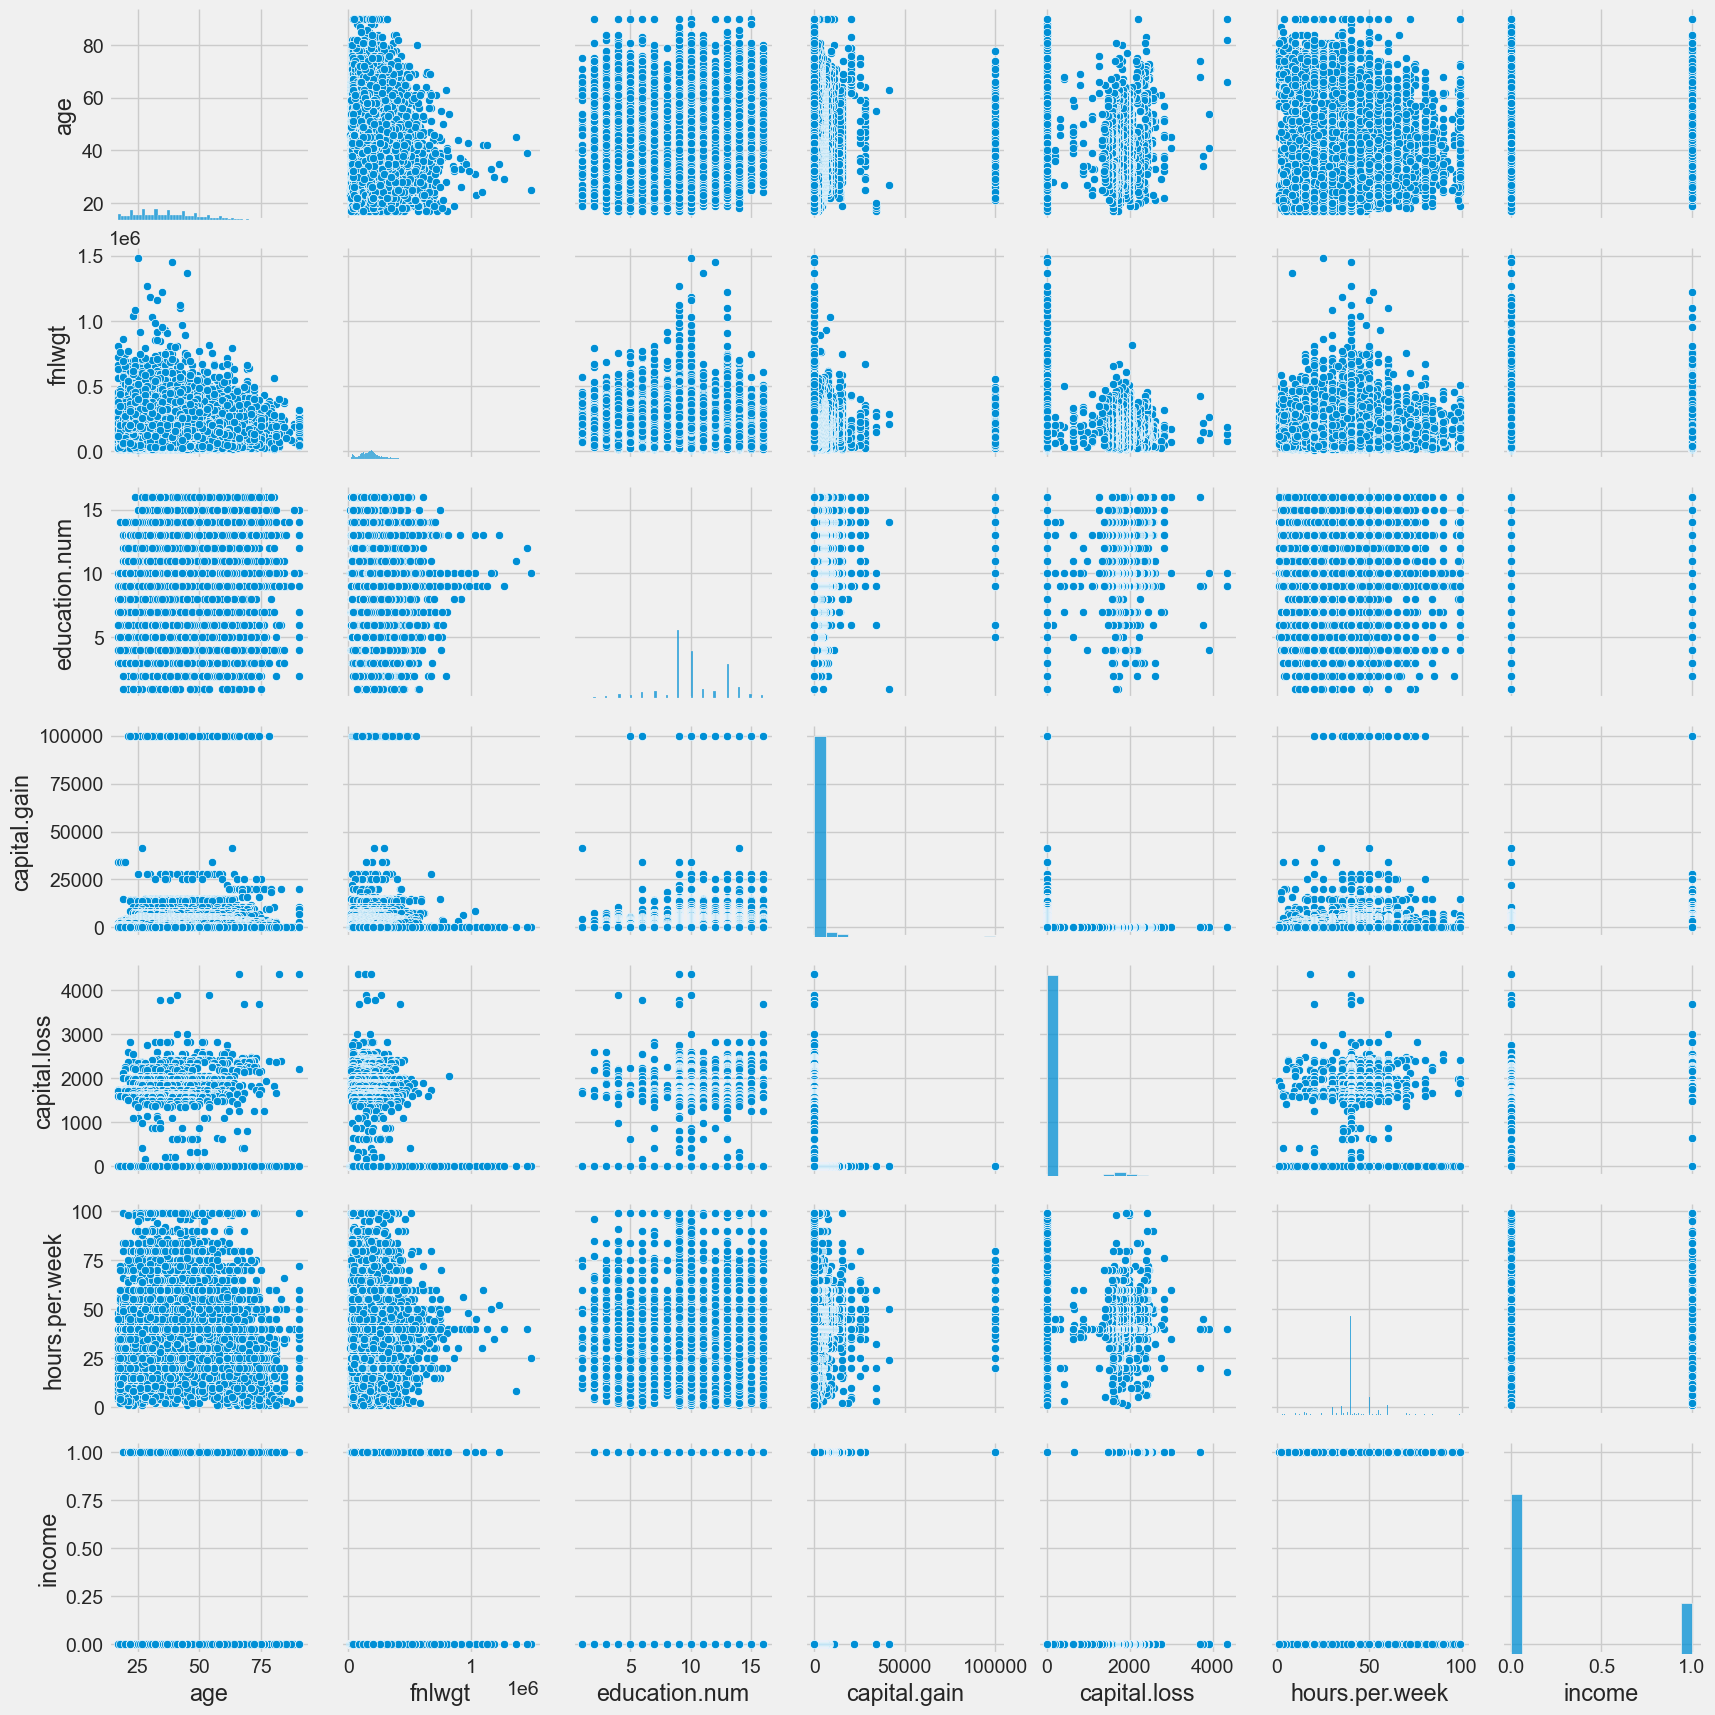

In [178]:
# Creating a pairplot of dataset
sns.pairplot(dataset)
plt.savefig('multi1.png')
plt.show()

In [193]:
numeric_df = dataset.select_dtypes(include=['float64', 'int64'])

# Create correlation matrix
corr_matrix = numeric_df.corr()
corr = dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

ValueError: could not convert string to float: 'Private'

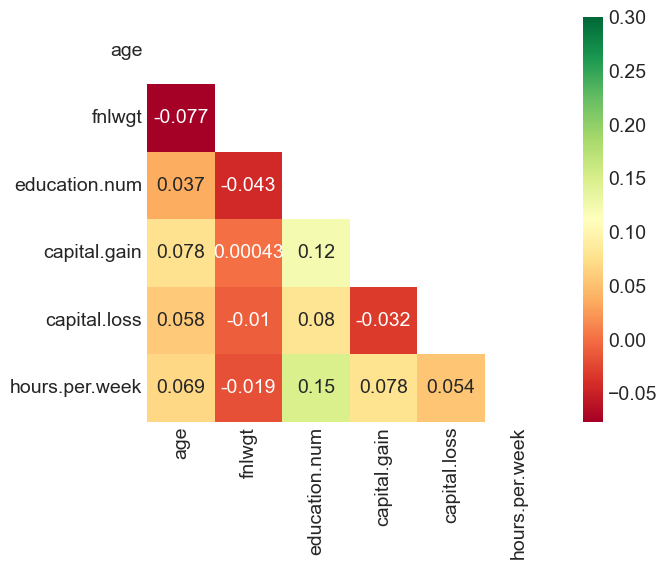

In [195]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only numeric columns (already done)
numeric_df = dataset.select_dtypes(include=['float64', 'int64'])

# Create the correlation matrix
corr = numeric_df.corr()

# Create mask for upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plotting the heatmap
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))  # Adjust size if needed
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, cmap='RdYlGn')

# Save and show the plot
plt.savefig('multi2.png')
plt.show()


<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
        
<li><p style="font-family:verdana;">
In this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.
</p></li>    

<li><p style="font-family:verdana;">
From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.
</p></li>    

</ul>

</div>

## Step 3: Data Preprocessing

### 3.1: Fixing '?' values in the dataset

In [200]:
dataset = dataset.replace('?', np.nan)

In [202]:
# Checking null values
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [204]:
columns_with_nan = ['workclass', 'occupation', 'native.country']

In [206]:
for col in columns_with_nan:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

### 3.2: Label Encoding

In [209]:
from sklearn.preprocessing import LabelEncoder

In [211]:
for col in dataset.columns:
    if dataset[col].dtypes == 'object':
        encoder = LabelEncoder()
        dataset[col] = encoder.fit_transform(dataset[col])

### 3.3: Feature Selection

In [214]:
X = dataset.drop('income', axis=1)
Y = dataset['income']

In [216]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [218]:
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [219]:
feature_imp = selector.feature_importances_

In [222]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.59
1 4.13
2 16.71
3 3.87
4 8.66
5 8.04
6 7.27
7 8.62
8 1.47
9 2.84
10 8.83
11 2.81
12 9.64
13 1.53


In [224]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   sex             32561 non-null  int32
 10  capital.gain    32561 non-null  int64
 11  capital.loss    32561 non-null  int64
 12  hours.per.week  32561 non-null  int64
 13  native.country  32561 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


In [226]:
X = X.drop(['workclass', 'education', 'race', 'sex',
            'capital.loss', 'native.country'], axis=1)

### 3.4: Feature Scaling

In [229]:
from sklearn.preprocessing import StandardScaler

In [231]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

### 3.5: Fixing imbalanced dataset using Oversampling

In [234]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

income
0    75.92 %
1    24.08 %
Name: proportion, dtype: object

In [236]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [238]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [240]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [242]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

income
0    50.0 %
1    50.0 %
Name: proportion, dtype: object

### 3.6: Creating a train test split

In [245]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [247]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39552, 8)
X_test shape: (9888, 8)
Y_train shape: (39552,)
Y_test shape: (9888,)


## Step 4: Data Modelling

### 4.1: Logistic Regression

In [251]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [253]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [255]:
Y_pred_log_reg = log_reg.predict(X_test)

### 4.2: KNN Classifier

In [258]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [260]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [262]:
Y_pred_knn = knn.predict(X_test)

### 4.3: Support Vector Classifier

In [265]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [267]:
svc.fit(X_train, Y_train)

SVC(random_state=42)

In [268]:
Y_pred_svc = svc.predict(X_test)

### 4.4: Naive Bayes Classifier

In [270]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [271]:
nb.fit(X_train, Y_train)

GaussianNB()

In [272]:
Y_pred_nb = nb.predict(X_test)

### 4.5: Decision Tree Classifier

In [274]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)

In [275]:
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [276]:
Y_pred_dec_tree = dec_tree.predict(X_test)

### 4.6: Random Forest Classifier

In [278]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)

In [279]:
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [280]:
Y_pred_ran_for = ran_for.predict(X_test)

### 4.7: XGB Classifier

In [283]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [284]:
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [285]:
Y_pred_xgb = xgb.predict(X_test)

## Step 5: Model Evaluation

In [287]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [288]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 75.25
F1 score: 75.08


In [289]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 83.42
F1 score: 84.43


In [290]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 81.58
F1 score: 82.56


In [291]:
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_nb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_nb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 64.68
F1 score: 48.42


In [292]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 91.61
F1 score: 92.01


In [298]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.6
F1 score: 92.93


In [302]:
print('XGB Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_xgb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_xgb) * 100, 2))

XGB Classifier:
Accuracy score: 86.07
F1 score: 86.61


## Step 6: Hyperparameter Tuning

In [304]:
from sklearn.model_selection import RandomizedSearchCV

In [305]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [308]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [318]:
rf_tuned = RandomForestClassifier(random_state=42)

In [325]:
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [327]:
rf_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [328]:
rf_cv.best_score_

0.9131271105332539

In [329]:
rf_cv.best_params_

{'n_estimators': 40, 'max_depth': 102}

In [330]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [331]:
rf_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [332]:
Y_pred_rf_best = rf_best.predict(X_test)

In [333]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.77
F1 score: 93.08


In [334]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf_best)

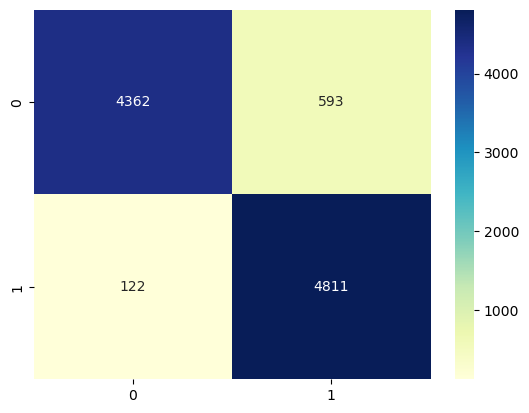

In [335]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [336]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      4955
           1       0.89      0.98      0.93      4933

    accuracy                           0.93      9888
   macro avg       0.93      0.93      0.93      9888
weighted avg       0.93      0.93      0.93      9888



<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Conclusion:</h3>

<ul>
    
<li><p style="font-family:verdana;">
In this project, we build various models like logistic regression, knn classifier, support vector classifier, decision tree classifier, random forest classifier and xgboost classifier.
</p></li>    

<li><p style="font-family:verdana;">
A hyperparameter tuned random forest classifier gives the highest accuracy score of 92.77 and f1 score of 93.08.
</p></li>    

</ul>

</div>

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Future work:</h3>

<ul>
        
<li><p style="font-family:verdana;">
We have a large enough dataset, so we can use neural networks such as an artificial neural network to build a model which can result in better performance.
</p></li>    

</ul>

</div>

In [2]:
import sys
print(sys.version)

3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


In [2]:
#brazilian ecommerce analysis
